In [4]:
# Importing the expected libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading dataset to pandas dataframe
file_path = r"./loan.csv"
df = pd.read_csv(file_path)
# Checking few values for the given dataset
df.head()

/var/folders/m6/80bkjjx93lxgkzttt0bnl9740000gq/T/ipykernel_9126/1746279803.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Checking the detailed info of the given dataset
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

# Data Cleanup

In [7]:
# Evaluating the fields with nan values
missing_value_percentage=df.isna().sum()*100/df.shape[0]
missing_value_percentage.sort_values(ascending=False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [8]:
# Filtering the fields with all nan records
missing_value_percentage[missing_value_percentage == 100]

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


In [9]:
# Dropping all fields with no data
df.drop(df.columns[missing_value_percentage == 100].tolist(), axis='columns', inplace=True)

In [10]:
# Evaluating the fields with nan values in the updated dataframe
missing_value_percentage=df.isna().sum()*100/df.shape[0]
missing_value_percentage.sort_values(ascending=False)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
home_ownership                 0.000000
int_rate                       0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
term                           0.000000


In [11]:
# Based on the observation of above data, dropping all fields with more than 90% nan data
df.drop(df.columns[missing_value_percentage > 90].tolist(), axis='columns', inplace=True)
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [12]:
# Analysing remaining fields in the dataset
for col in df.columns:
    print(df[col].describe())
    print("==================================\n\n")

count    3.971700e+04
mean     6.831319e+05
std      2.106941e+05
min      5.473400e+04
25%      5.162210e+05
50%      6.656650e+05
75%      8.377550e+05
max      1.077501e+06
Name: id, dtype: float64


count    3.971700e+04
mean     8.504636e+05
std      2.656783e+05
min      7.069900e+04
25%      6.667800e+05
50%      8.508120e+05
75%      1.047339e+06
max      1.314167e+06
Name: member_id, dtype: float64


count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35

In [13]:
# Based on the analysis of fields above, `term` field needs to be convert to integer.
# Checking the variation in values
df.term.value_counts(ascending=False)

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [14]:
# Converting `term` to integer
df['term'] = df.term.apply(lambda x: int(x.replace(' months', '')))
df.term.value_counts(ascending=False)

term
36    29096
60    10621
Name: count, dtype: int64

In [15]:
# Based on the analysis of fields above, `int_rate` field needs to be convert to float.
# Checking the variation in values
df.int_rate.value_counts(ascending=False)

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [16]:
# Converting `int_rate` to float
df['int_rate'] = df.int_rate.apply(lambda x: float(str(x).replace('%', '')))
df['int_rate'] = df.int_rate.astype(float)
df.int_rate.value_counts(ascending=False)

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

In [17]:
df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [18]:
# Based on the analysis of fields above, `emp_length` field needs to be convert to integer.
# Checking the variation in values
df.emp_length.value_counts(ascending=False)

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [19]:
# Extracting integer values for `emp_length`
def extract_num(val):
  val = str(val).strip()

  if val.startswith("10+"):
    return 10
  elif val.startswith("< 1") or val == "nan":
    return 0
  else:
    return int(val.split(' ')[0])

df['emp_length'] = df.emp_length.apply(extract_num)

In [20]:
df.emp_length.value_counts()

emp_length
10    8879
0     5658
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [21]:
# Importing datetime library
from datetime import datetime

# Custoom method for converting string/null to datetime object
def convert_to_datetime_obj(x):
    if x == "epoch":
        return datetime(1970, 1, 1, 0, 0, 0)

    return datetime.strptime(x, '%b-%y')

# Filling null values in datetime attributes to the string 'epoch'. And then converting date fields from string to datetime object.
df['issue_d'] = df.issue_d.fillna("epoch")
df['issue_d'] = df.issue_d.apply(convert_to_datetime_obj)

df['earliest_cr_line'] = df.earliest_cr_line.fillna("epoch")
df['earliest_cr_line'] = df.earliest_cr_line.apply(convert_to_datetime_obj)

df['last_credit_pull_d'] = df.last_credit_pull_d.fillna("epoch")
df['last_credit_pull_d'] = df.last_credit_pull_d.apply(convert_to_datetime_obj)

df['last_pymnt_d'] = df.last_pymnt_d.fillna("epoch")
df['last_pymnt_d'] = df.last_pymnt_d.apply(convert_to_datetime_obj)

In [22]:
# Extracting loan issue year and month from `issue_d` field
from datetime import datetime
df["loan_issue_year"] = pd.DatetimeIndex(df.issue_d).year
df["loan_issue_month"] = pd.DatetimeIndex(df.issue_d).month
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_issue_year,loan_issue_month
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2011,12


In [23]:
# Based on analysis of fields above, there are a bunch of fields with exactly the same data for all records
# collections_12_mths_ex_med: 0
# policy_code: 1
# acc_now_delinq: 0
# chargeoff_within_12_mths: 0
# delinq_amnt: 0
# tax_liens: 0
# application_type: INDIVIDUAL
# pymnt_plan: n

# Dropping these columns
df.drop(['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'application_type', 'pymnt_plan'], axis='columns', inplace=True)
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  int64         
 6   int_rate                 39717 non-null  float64       
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                37258 non-null  object        
 11  emp_length               39717 non-null  int64         
 12  home_ownership           39717 n

In [24]:
# Dropping unnecessary or unstructured text attributes
df.drop(columns=['desc', 'title', 'id', 'member_id', 'url', 'zip_code', 'sub_grade', 'emp_title'], axis='columns', inplace=True)

In [25]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_year,loan_issue_month
0,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,24000.0,...,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,2011,12
1,2500,2500,2500.0,60,15.27,59.83,C,0,RENT,30000.0,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,12
2,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,12252.0,...,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,2011,12
3,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,49200.0,...,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,12
4,3000,3000,3000.0,60,12.69,67.79,B,1,RENT,80000.0,...,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,2011,12


In [26]:
# Imputing null values in `pub_rec_bankruptcies` to 0
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)  # Assume no bankruptcy if missing

In [27]:
# Checking for remaining missing values
df.isna().sum().sort_values(ascending=False)

mths_since_last_delinq     25682
revol_util                    50
loan_amnt                      0
total_rec_prncp                0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_int                  0
pub_rec                        0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_d                   0
last_pymnt_amnt                0
last_credit_pull_d             0
pub_rec_bankruptcies           0
loan_issue_year                0
revol_bal                      0
open_acc                       0
funded_amnt                    0
annual_inc                     0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                     0
home_owner

In [28]:
# Final shape of the dataset
df.shape

(39717, 41)

In [29]:
# Check all available columns
print(df.columns)

# Check first few rows of the dataframe
df.head()

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'loan_issue_year',
       'loan_issue_month'],
      dtype='object')


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_year,loan_issue_month
0,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,24000.0,...,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,2011,12
1,2500,2500,2500.0,60,15.27,59.83,C,0,RENT,30000.0,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,12
2,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,12252.0,...,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,2011,12
3,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,49200.0,...,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,12
4,3000,3000,3000.0,60,12.69,67.79,B,1,RENT,80000.0,...,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,2011,12


# UNIVARIATE ANALYSIS

## 1. Loan Amount
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

Distribution of Loan amount can provide insights into the market demand

In [30]:
df.loan_amnt.value_counts(ascending=False)

loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64

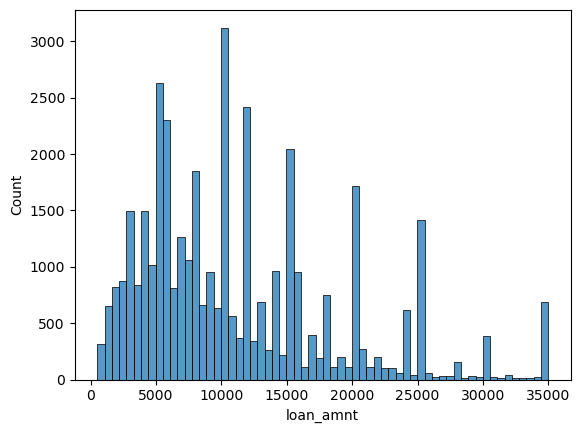

In [31]:
sns.histplot(df.loan_amnt)
plt.show()

## 2. Interest Rate
Interest Rate on the loan

Distribution of interest rate showcases the following:
- Highest profitability for the bank.
- Acceptable range of interest rates.
- High risk loans (when compared with other variables)
- Low risk loans (when compared with other variables)

In [32]:
df.int_rate.value_counts(ascending=False)

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

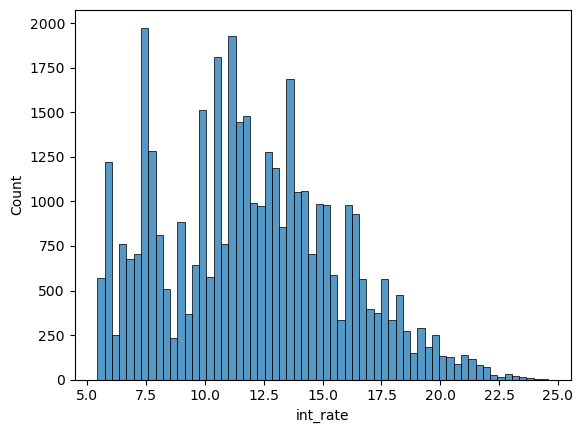

In [33]:
sns.histplot(df.int_rate)
plt.show()

## 3. Annual Income
The self-reported annual income provided by the borrower during registration.

Distribution of annual income indicates the existing customer segment and can point to potential customers to target.

In [34]:
df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

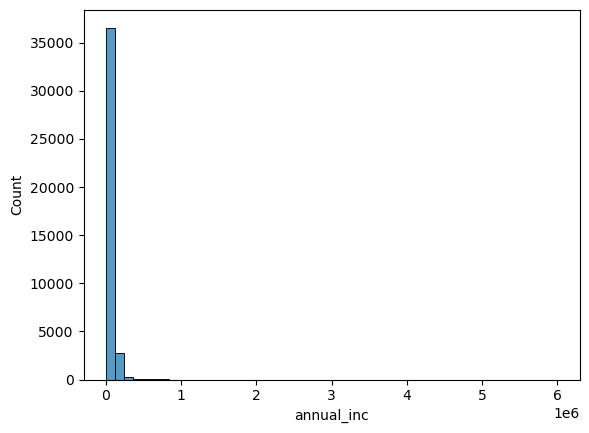

In [35]:
sns.histplot(df.annual_inc, bins=50)
plt.show()

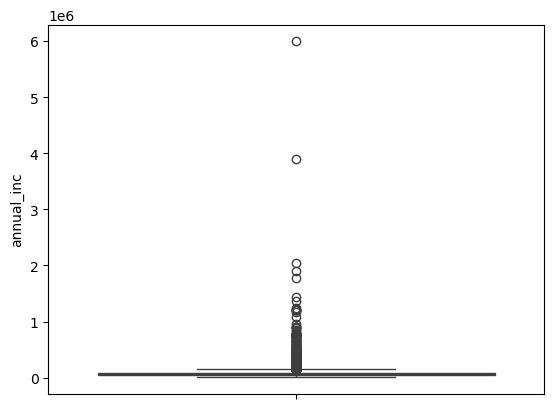

In [36]:
sns.boxplot(df.annual_inc)
plt.show()

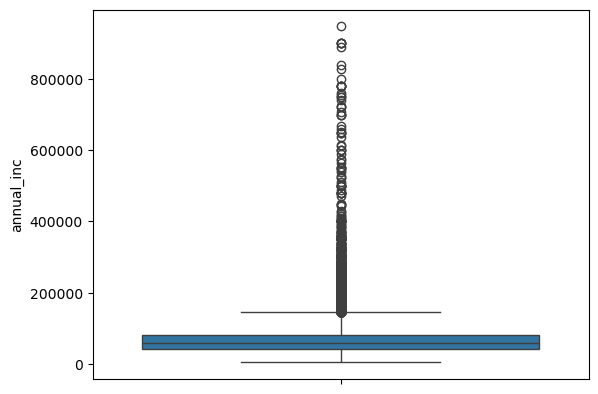

In [37]:
# Since the customers with extremely high income seem to be outliers, we can possibly exclude them for our analysis.
df_excluding_hii = df[df.annual_inc < 1000000]
sns.boxplot(df_excluding_hii.annual_inc)
plt.show()

## 3. Annual Income
The self-reported annual income provided by the borrower during registration.

This is an important metric for evaluating the borrower's ability to repay. Distribution of this metric points to the risk factor in repayment of existing loans.

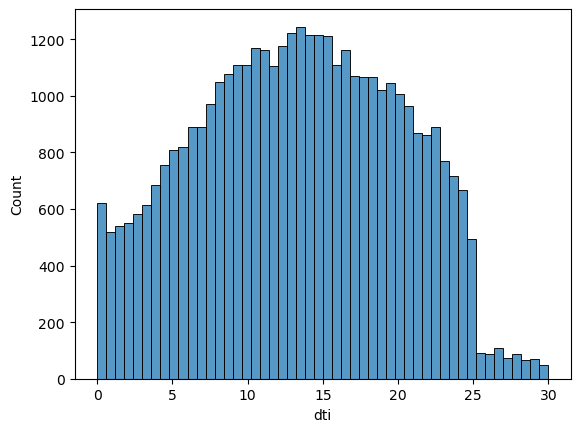

In [38]:
sns.histplot(df.dti)
plt.show()

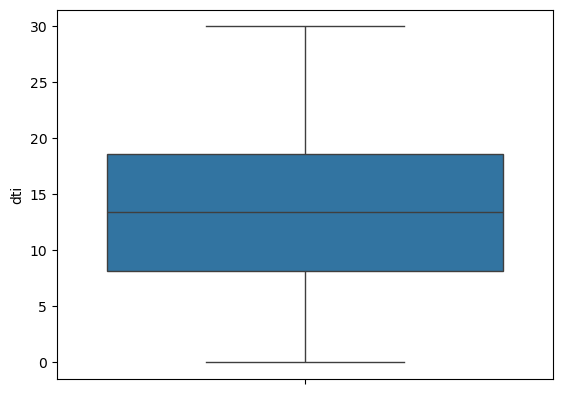

In [39]:
sns.boxplot(df.dti)
plt.show()

## 4. Address State
The state provided by the borrower in the loan application.

This metric provides following insights:
- State-wise demand for loans.
- Highest current cutomer base.
- Lowest current customer base.

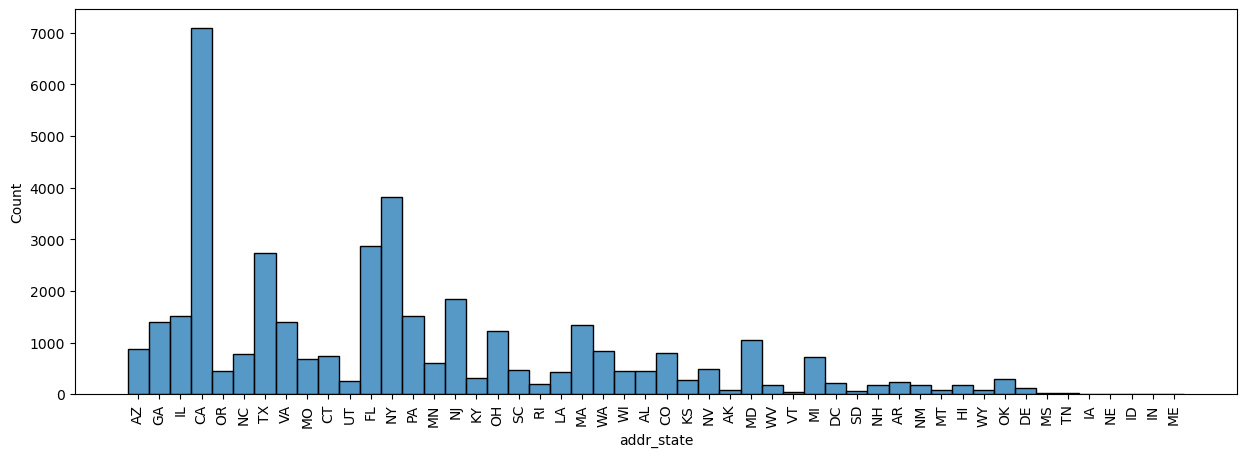

In [40]:
plt.figure(figsize=(15,5))
sns.histplot(df.addr_state)
plt.xticks(rotation=90)
plt.show()

## 5. Home Ownership
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

This metric helps in idenitfying customers who do not have any other long tenure loan or liability. Also, it points to the customers with higher financial stability.

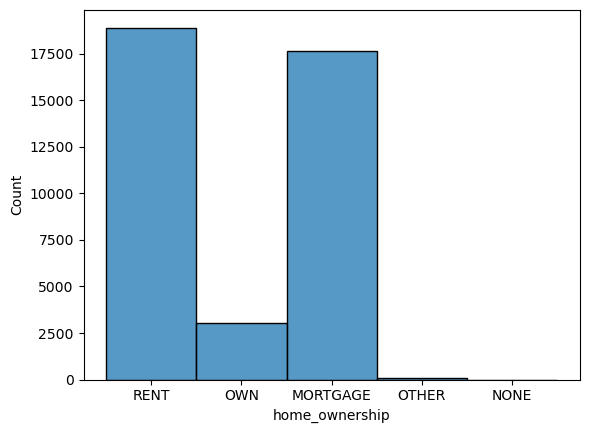

In [41]:
sns.histplot(df.home_ownership)
plt.show()

## 6. Loan Status
Current status of the loan.

This showcases the existing customer with unpaid loans. This indirectly also points to the total funds still getting rotated in market versus liquidity with the bank for offering loans to potential customers.

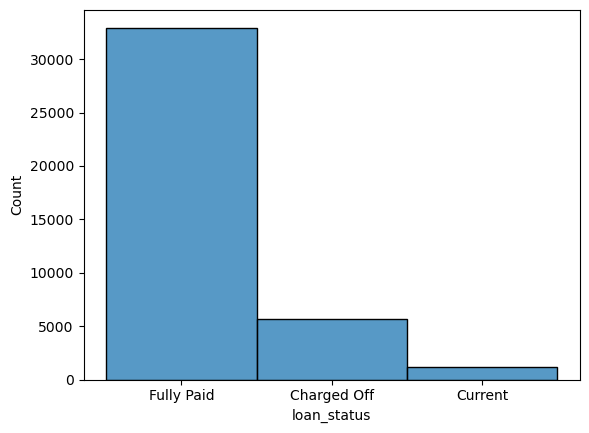

In [42]:
sns.histplot(df.loan_status)
plt.show()

## 7. Grade
LC assigned loan grade.

This metric defines range of high risk loans.

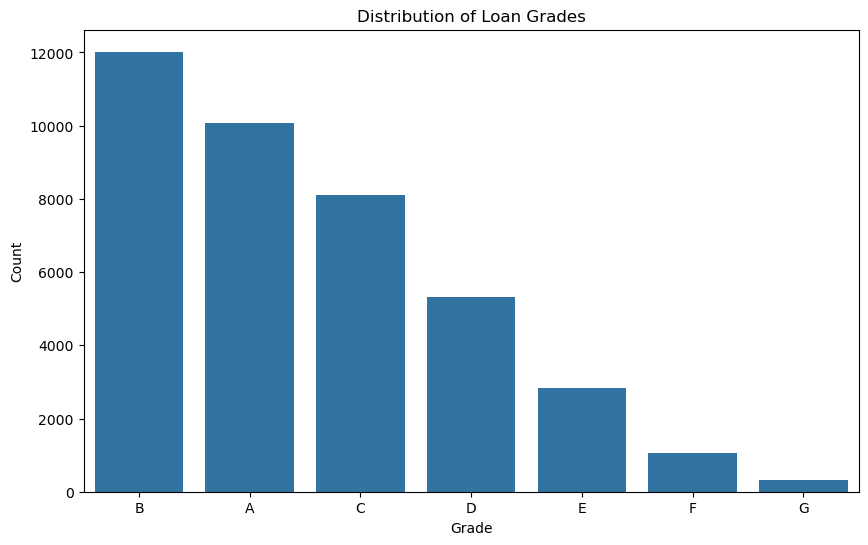

In [43]:
# Bar plot for 'grade'
plt.figure(figsize=(10,6))
sns.countplot(x='grade', data=df, order=df['grade'].value_counts().index)
plt.title('Distribution of Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

## 8. Employment Length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

Distribution of this metric gives insight into customers with varied employment lengths and possibly the ability to repay the loan.

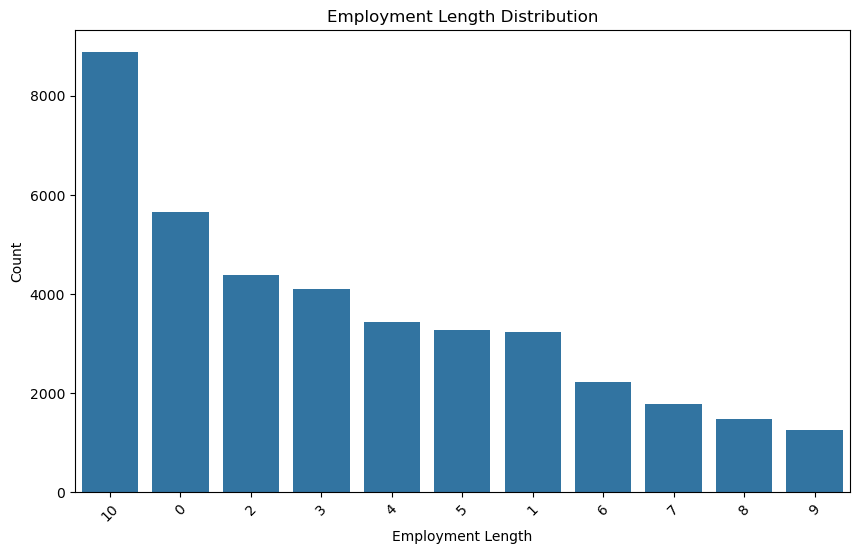

In [44]:
# Assuming 'emp_length' signifies employment status
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length', data=df, order=df['emp_length'].value_counts().index)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 9. Purpose
A category provided by the borrower for the loan request.

Shows distribution of market demand for different types of loans.

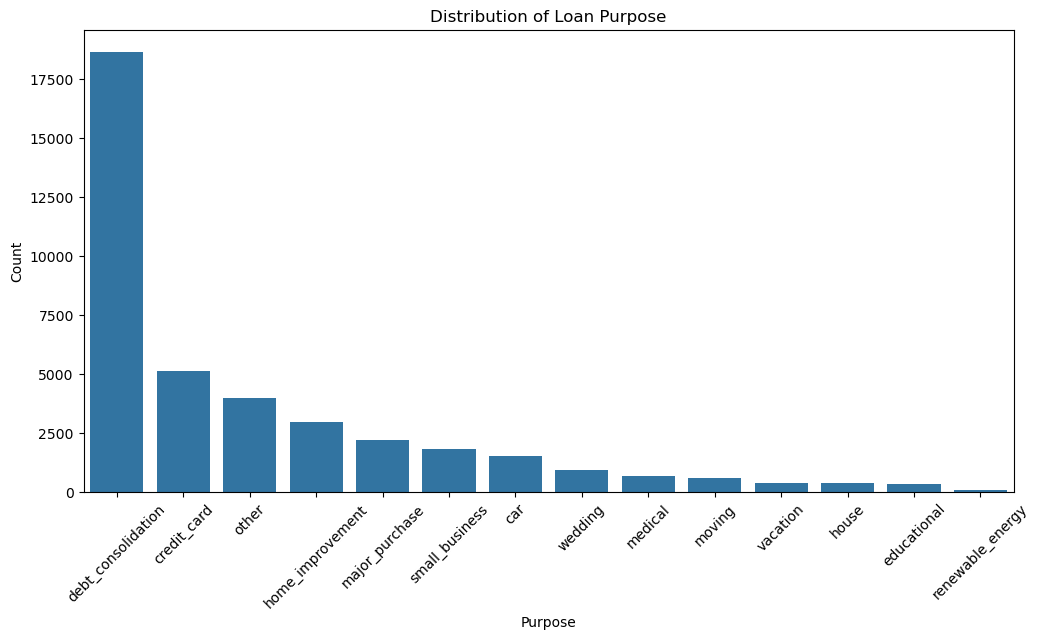

In [45]:
# Bar plot for 'purpose'
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', data=df, order=df['purpose'].value_counts().index)
plt.title('Distribution of Loan Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 10. Loan Term
The number of payments on the loan. Values are in months and can be either 36 or 60.

Shows distribution of loan term.

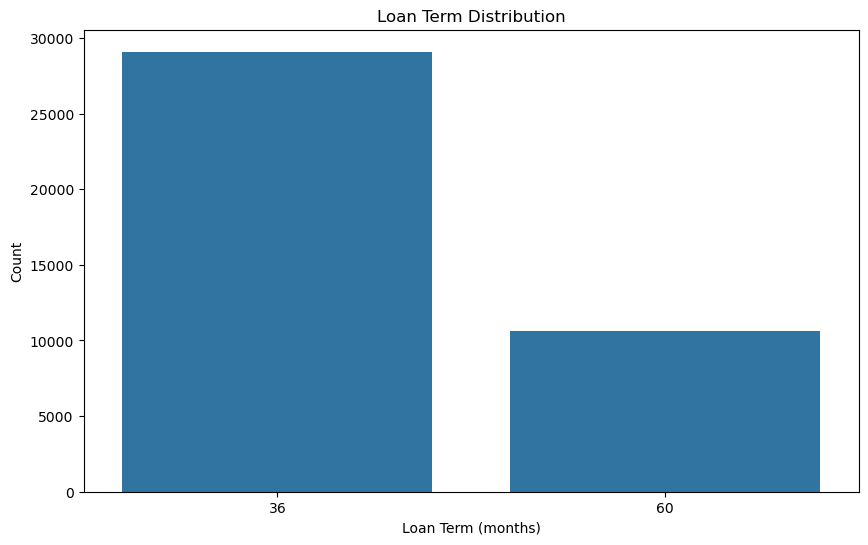

In [46]:
# Assuming 'term' signifies loan term
plt.figure(figsize=(10,6))
sns.countplot(x='term', data=df, order=df['term'].value_counts().index)
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term (months)')
plt.ylabel('Count')
plt.show()

## 11. Loan to Income Ratio
This is a derived metric obtained as a ratio of Loan Amount and Income. A higher ratio may signal that a borrower is over-leveraged, making it a strong predictor of default risk.

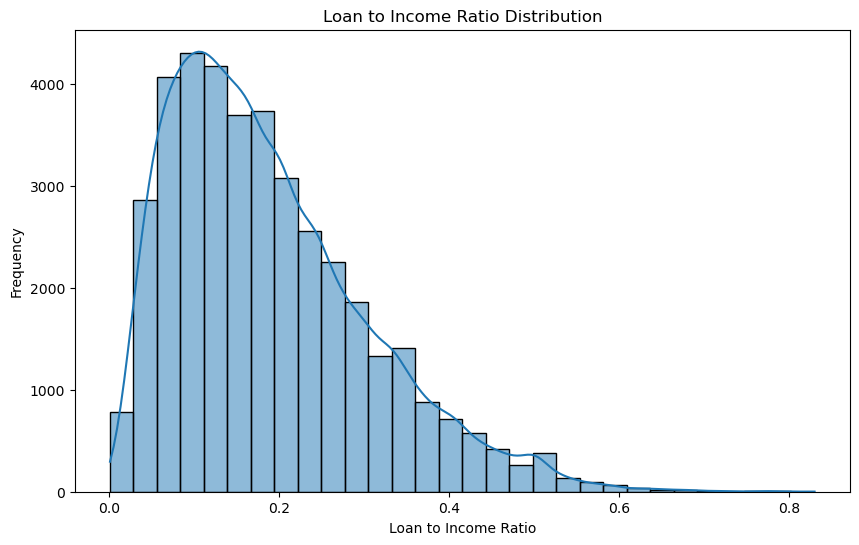

In [47]:
# Creating new metrices
# 1. Create Loan to Income Ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['annual_inc']

# Visualize Loan to Income Ratio
plt.figure(figsize=(10,6))
sns.histplot(df['loan_to_income_ratio'], bins=30, kde=True)
plt.title('Loan to Income Ratio Distribution')
plt.xlabel('Loan to Income Ratio')
plt.ylabel('Frequency')
plt.show()

## 12. Credit Score Proxy
Calculating a FICO proxy based on existing credit variables. Credit scores often correlate with risk levels, and this binning will help identify risk patterns more clearly.

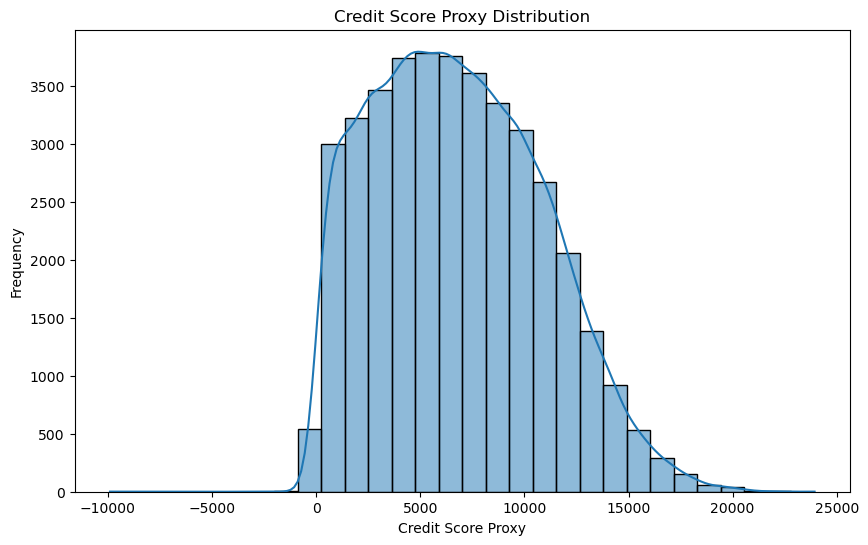

In [48]:
# 2. Calculating a FICO proxy based on existing credit variables
# Using 'delinq_2yrs', 'inq_last_6mths', 'revol_util', 'total_acc' to create an aggregated credit score proxy


# Converting 'revol_util' from string to numeric, and filling missing values
df['revol_util'] = pd.to_numeric(df['revol_util'].str.replace('%', ''), errors='coerce')
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

# Create an aggregated credit score proxy based on available variables (this can be adjusted)
df['credit_score_proxy'] = (100 - df['delinq_2yrs']*20 - df['inq_last_6mths']*10 + df['total_acc']*2) * (100 - df['revol_util'])

# Credit Score Proxy Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['credit_score_proxy'], bins=30, kde=True)
plt.title('Credit Score Proxy Distribution')
plt.xlabel('Credit Score Proxy')
plt.ylabel('Frequency')
plt.show()

## 13. Missed Payments
If the data includes missed payments, create a metric that counts them. More missed payments would strongly indicate the risk of future default.

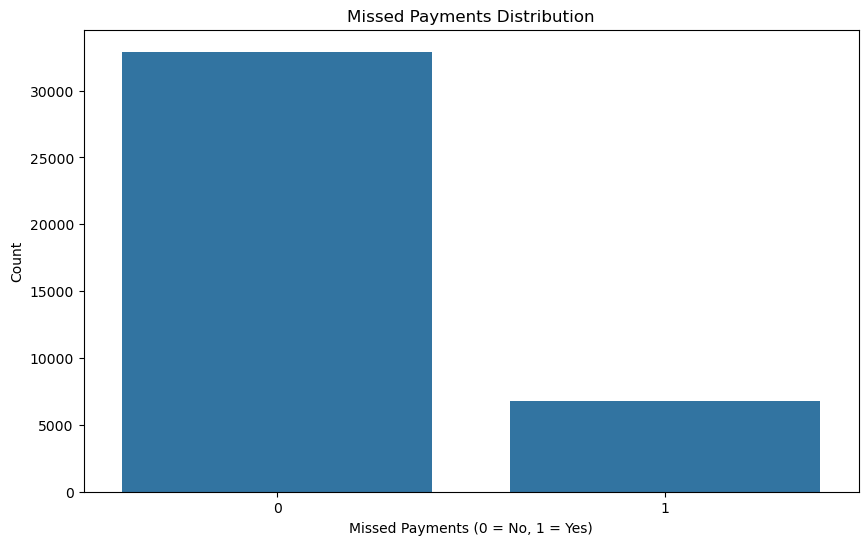

In [49]:
# 3. Calculating missed payments based on 'loan_status' and 'total_rec_late_fee'
# If 'loan_status' is 'Charged Off' or 'Default', mark it as missed payment.
df['missed_payments'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)

# If total late fee > 0, mark as missed payments
df['missed_payments'] = df.apply(lambda x: 1 if x['total_rec_late_fee'] > 0 else x['missed_payments'], axis=1)

# Missed Payments Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='missed_payments', data=df)
plt.title('Missed Payments Distribution')
plt.xlabel('Missed Payments (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [50]:
# Credit Utilization Rate
df['credit_utilization'] = df['revol_bal'] / (df['open_acc'] + 1)

# Installment-to-Income Ratio
df['installment_to_income_ratio'] = df['installment'] / (df['annual_inc'] / 12)

# Delinquency Risk Index
df['delinquency_risk_index'] = df['delinq_2yrs'] + df['pub_rec']

# Loan Payment to Principal Ratio
df['loan_payment_to_principal_ratio'] = df['total_pymnt'] / df['loan_amnt']

# Loan Principal Recovery Rate
df['loan_principal_recovery_rate'] = df['recoveries'] / df['loan_amnt']

# Loan Charge-Off Rate
df['loan_charge_off_rate'] = df['collection_recovery_fee'] / df['loan_amnt']

# Employment Length as Categorical
df['emp_length_cat'] = pd.cut(df['emp_length'], bins=[-1, 1, 5, 10, 20], labels=["<1yr", "1-5yr", "5-10yr", "10+yr"])

# Convert loan_status to binary where 'Charged Off' is 1 and others are 0
df['loan_status_binary'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,credit_score_proxy,missed_payments,credit_utilization,installment_to_income_ratio,delinquency_risk_index,loan_payment_to_principal_ratio,loan_principal_recovery_rate,loan_charge_off_rate,emp_length_cat,loan_status_binary
0,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,24000.0,...,1760.4,0,3412.000000,0.081435,0,1.172631,0.000000,0.000000,5-10yr,0
1,2500,2500,2500.0,60,15.27,59.83,C,0,RENT,30000.0,...,5254.8,1,421.750000,0.023932,0,0.403484,0.046832,0.000444,<1yr,1
2,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,12252.0,...,150.0,0,985.333333,0.082595,0,1.252361,0.000000,0.000000,5-10yr,0
3,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,49200.0,...,12956.0,1,508.909091,0.082759,0,1.223189,0.000000,0.000000,5-10yr,0
4,3000,3000,3000.0,60,12.69,67.79,B,1,RENT,80000.0,...,8113.6,0,1736.437500,0.010169,0,1.171110,0.000000,0.000000,<1yr,0


In [51]:
# Set up the visual style
sns.set(style="whitegrid")

# Segmented Analysis

In [52]:
# Check all available columns
print(df.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'loan_issue_year',
       'loan_issue_month', 'loan_to_income_ratio', 'credit_score_proxy',
       'missed_payments', 'credit_utilization', 'installment_to_income_ratio',
       'delinquency_risk_index', 'loan_payment_to_principal_ratio',
       'loan_principal_recovery_rate', 'loan_charge_off_rate',
 

## 1. By Categorised Employment Length (emp_length_cat):
Analyze key variables like loan_amnt, int_rate, and term to see how loan characteristics differ by employment length category and whether certain employment lengths are more prone to default.

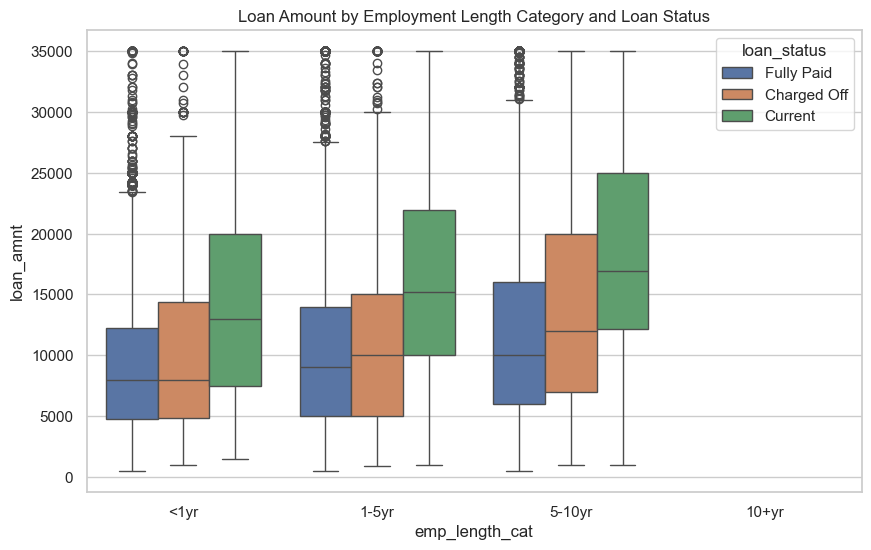

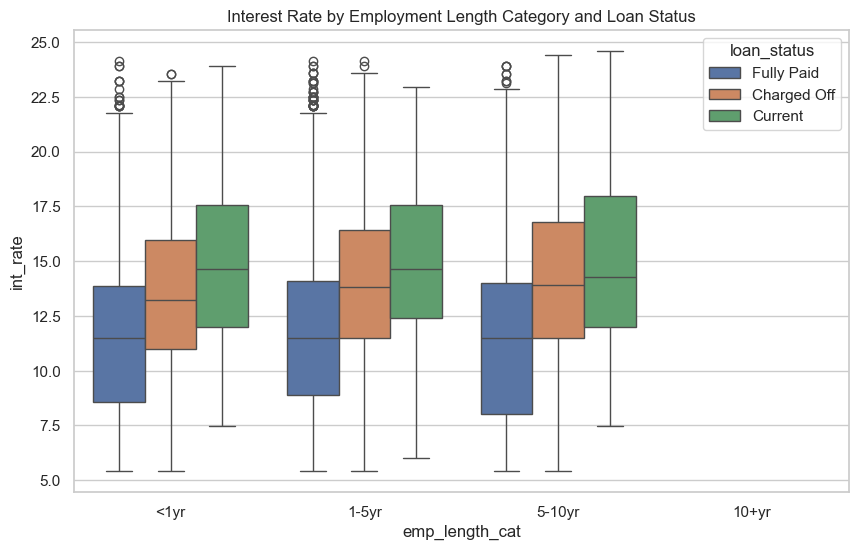

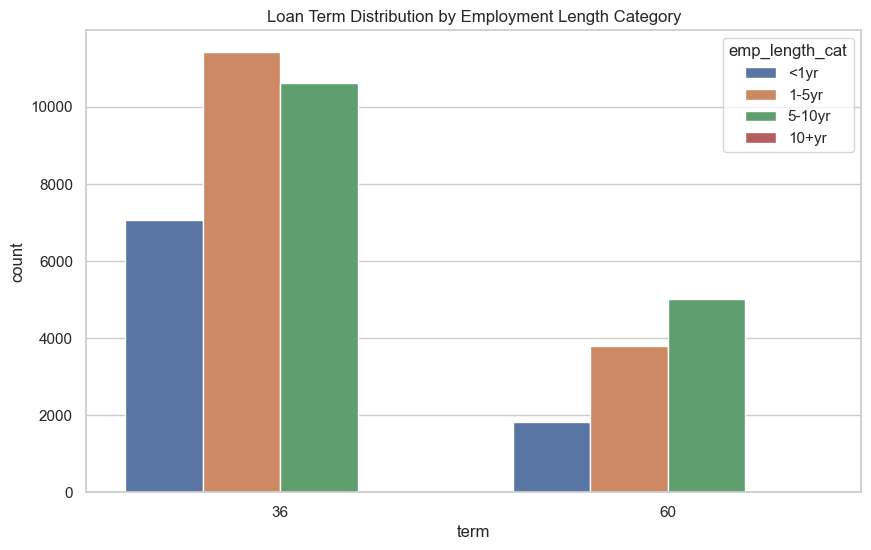

In [53]:
# 1. Segment by Employment Length (emp_length_cat)
# Analyze loan amount, interest rate, and term for each employment length category

plt.figure(figsize=(10, 6))
sns.boxplot(x='emp_length_cat', y='loan_amnt', hue='loan_status', data=df)
plt.title('Loan Amount by Employment Length Category and Loan Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='emp_length_cat', y='int_rate', hue='loan_status', data=df)
plt.title('Interest Rate by Employment Length Category and Loan Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='emp_length_cat', data=df)
plt.title('Loan Term Distribution by Employment Length Category')
plt.show()


## 2. By Income Level (annual_inc):
Segment the annual_inc column into bins (e.g., low, medium, high income) and examine variables like loan_amnt, loan_term, and int_rate to check for any trends in defaults based on income levels.

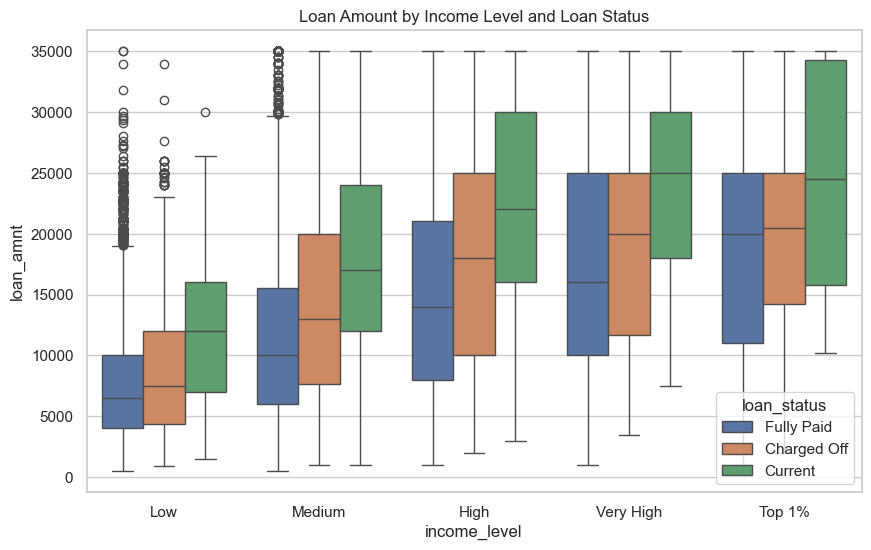

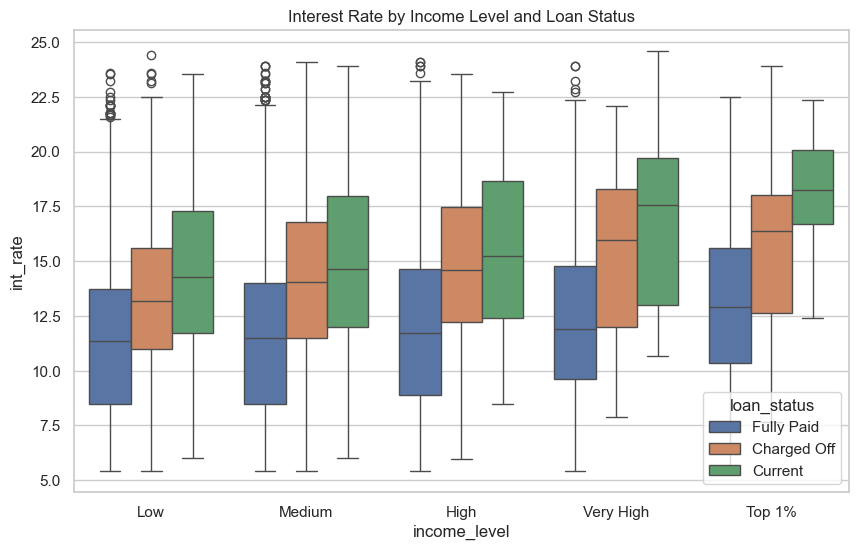

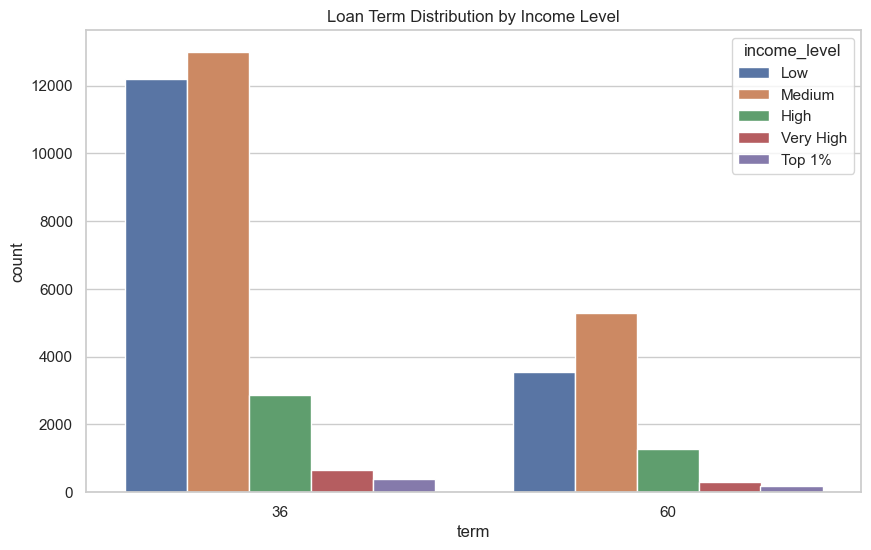

In [54]:
# 2. Segment by Income Level (annual_inc)
# Create income bins and analyze loan characteristics
df['income_level'] = pd.cut(df['annual_inc'], 
                                    bins=[0, 50000, 100000, 150000, 200000, df['annual_inc'].max()], 
                                    labels=['Low', 'Medium', 'High', 'Very High', 'Top 1%'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='income_level', y='loan_amnt', hue='loan_status', data=df)
plt.title('Loan Amount by Income Level and Loan Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='income_level', y='int_rate', hue='loan_status', data=df)
plt.title('Interest Rate by Income Level and Loan Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='income_level', data=df)
plt.title('Loan Term Distribution by Income Level')
plt.show()

## 3. By Region (addr_state):
Break down by region (US states) to identify if certain regions have a higher proportion of risky loans. Analyze loan_amnt and int_rate for regional patterns.

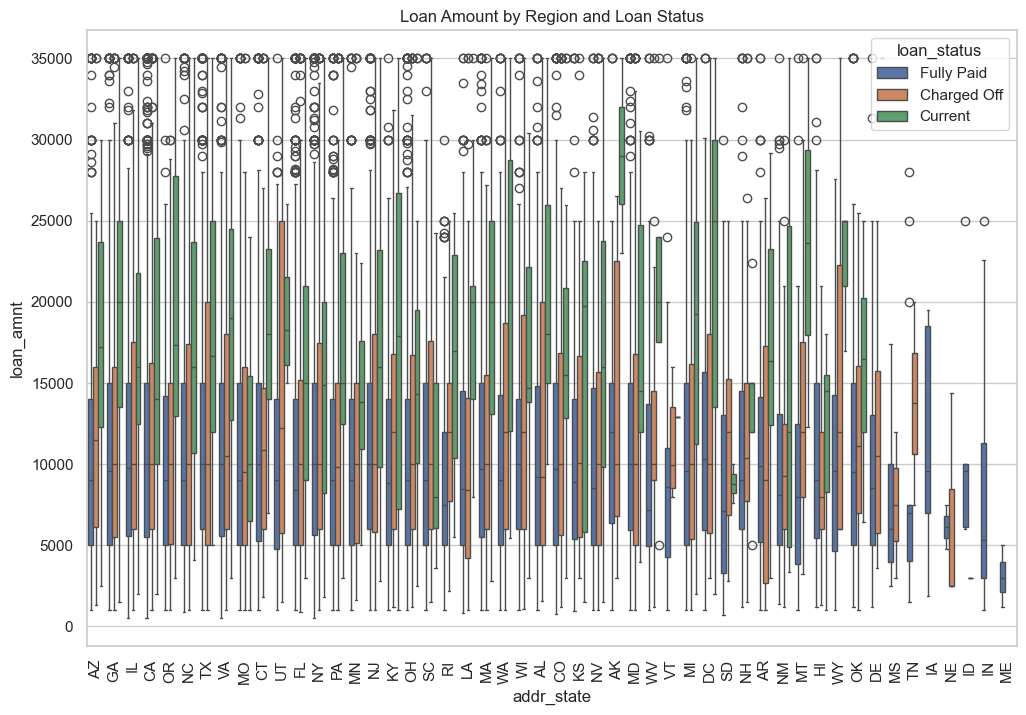

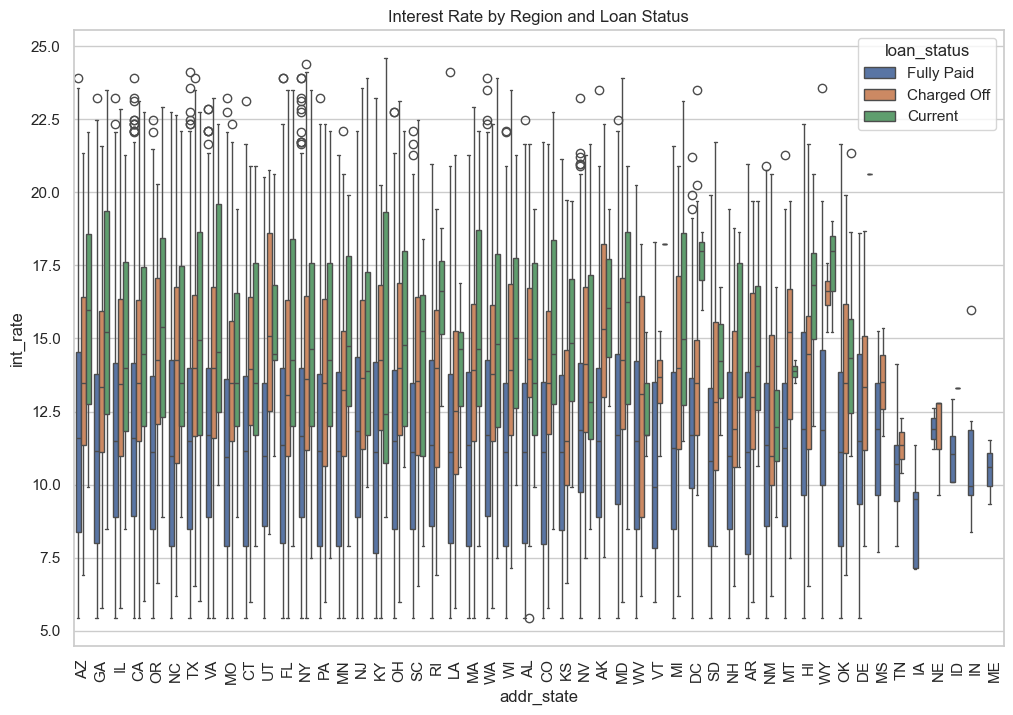

In [55]:
# 3. Segment by Region (addr_state)
# Analyze loan amount and interest rate by region

plt.figure(figsize=(12, 8))
sns.boxplot(x='addr_state', y='loan_amnt', hue='loan_status', data=df)
plt.title('Loan Amount by Region and Loan Status')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='addr_state', y='int_rate', hue='loan_status', data=df)
plt.title('Interest Rate by Region and Loan Status')
plt.xticks(rotation=90)
plt.show()

## 4. By Loan Purpose (purpose):
Examine how loan characteristics vary based on the purpose of the loan and whether specific purposes are linked to higher default rates.

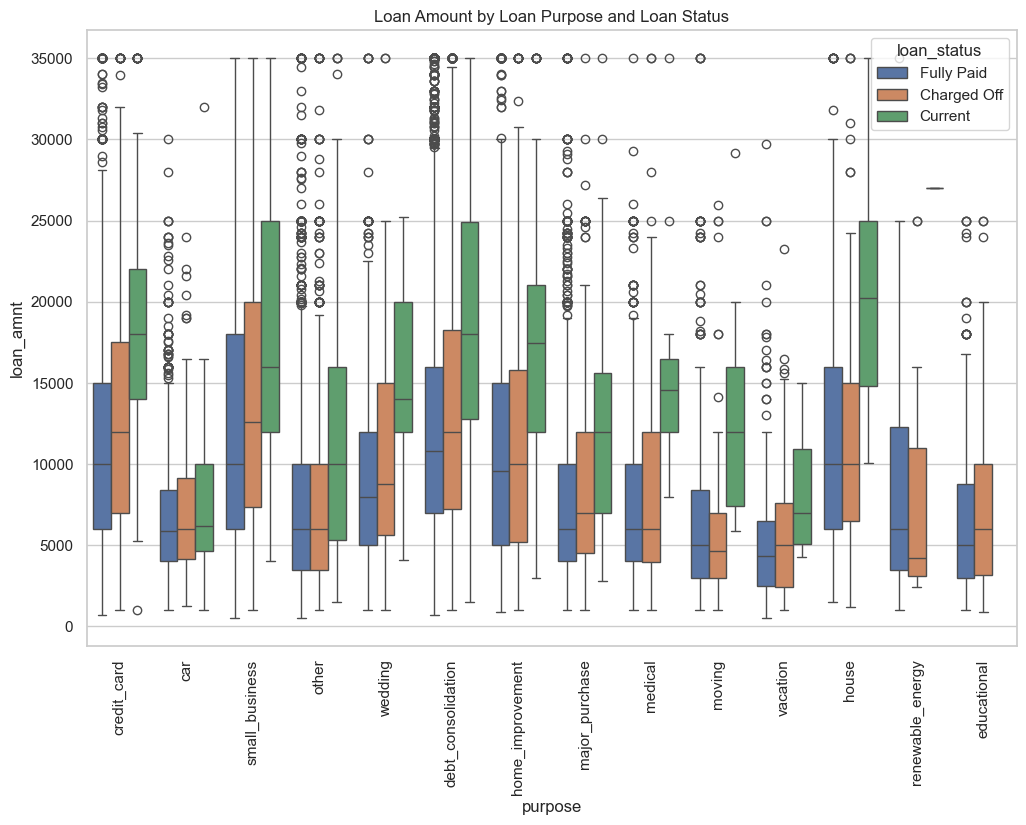

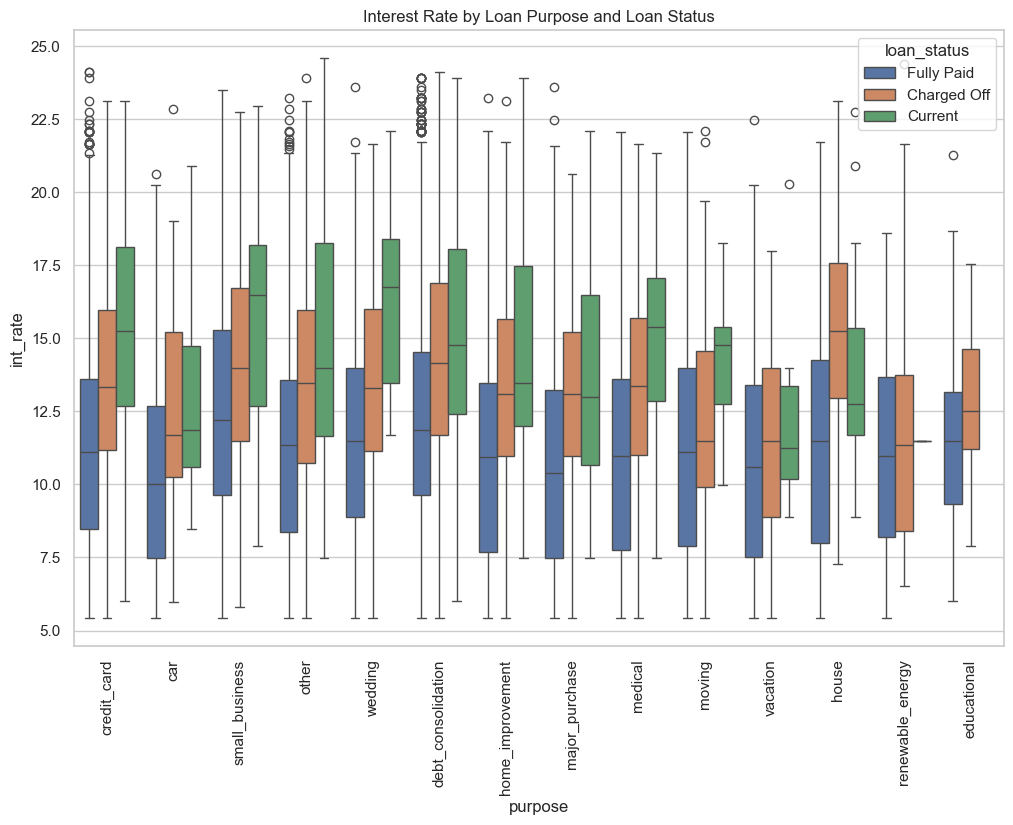

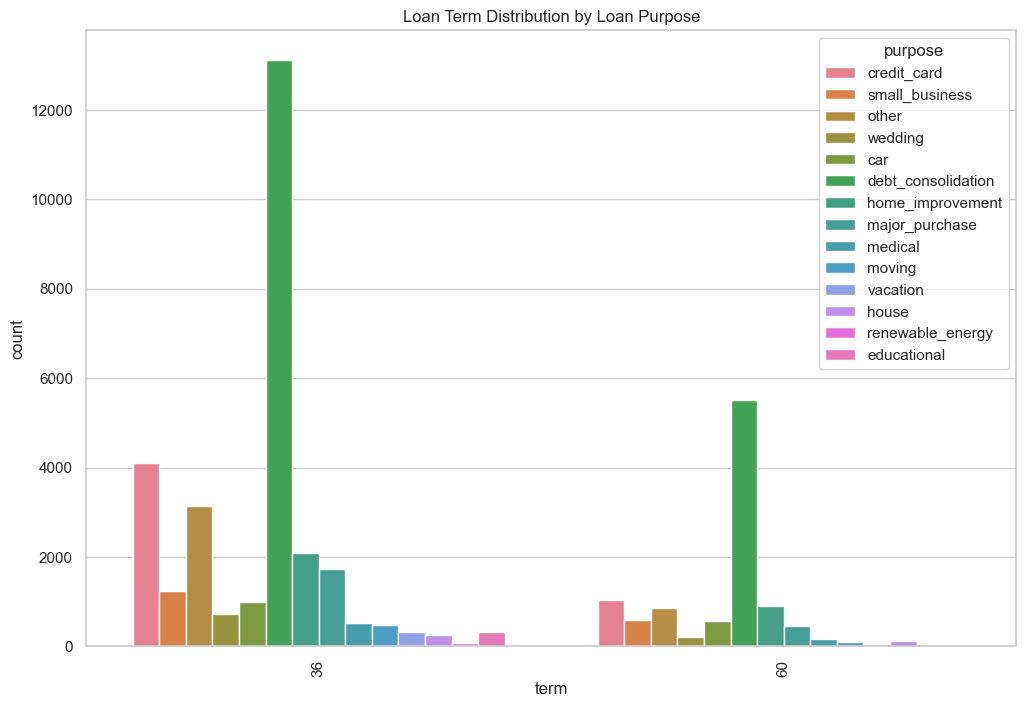

In [56]:
# 4. Segment by Loan Purpose (purpose)
# Analyze loan amount, interest rate, and term by loan purpose

plt.figure(figsize=(12, 8))
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data=df)
plt.title('Loan Amount by Loan Purpose and Loan Status')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data=df)
plt.title('Interest Rate by Loan Purpose and Loan Status')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='term', hue='purpose', data=df)
plt.title('Loan Term Distribution by Loan Purpose')
plt.xticks(rotation=90)
plt.show()


# Bivariate Analysis

## 1. Credit Utilization vs. Loan Status

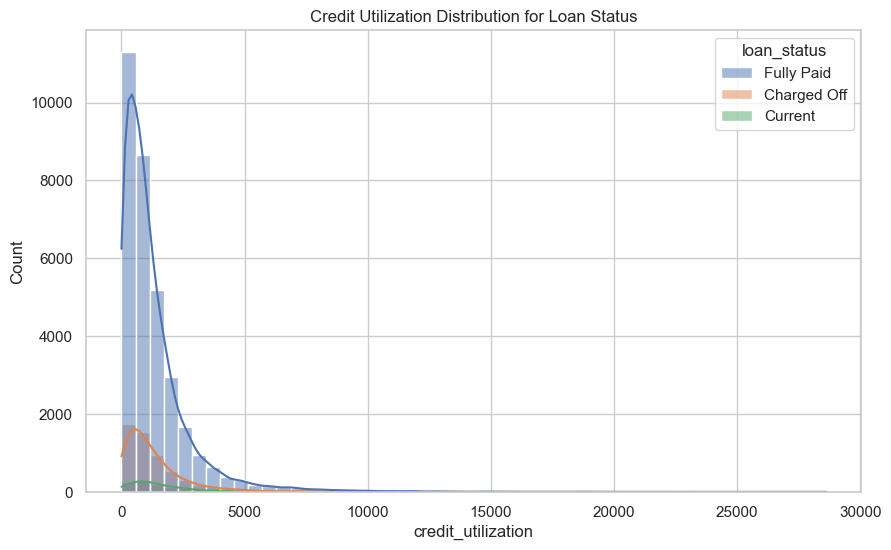

In [57]:
# . Credit Utilization vs. Loan Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='credit_utilization', hue='loan_status', kde=True, bins=50)
plt.title('Credit Utilization Distribution for Loan Status')
plt.show()

## 2. Installment-to-Income Ratio vs. Loan Status

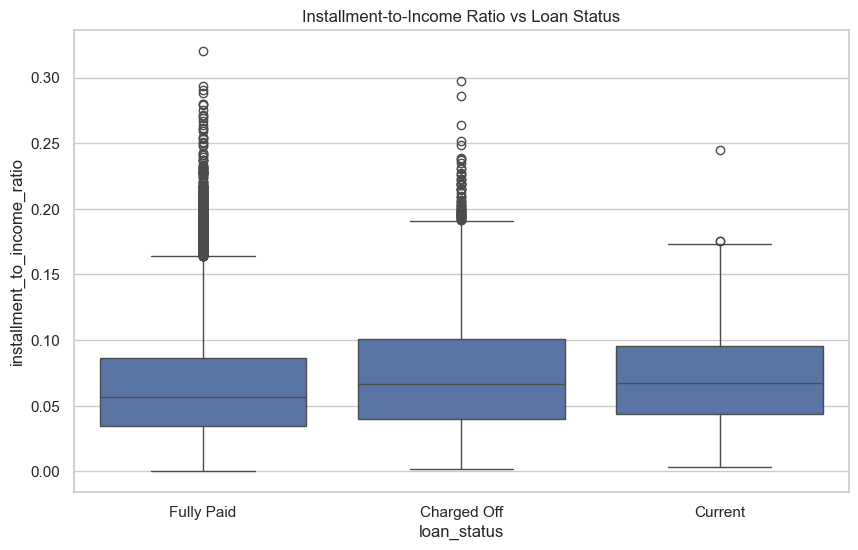

In [58]:
# . Installment-to-Income Ratio vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='installment_to_income_ratio', data=df)
plt.title('Installment-to-Income Ratio vs Loan Status')
plt.show()

## 3. Delinquency Risk Index vs. Loan Status

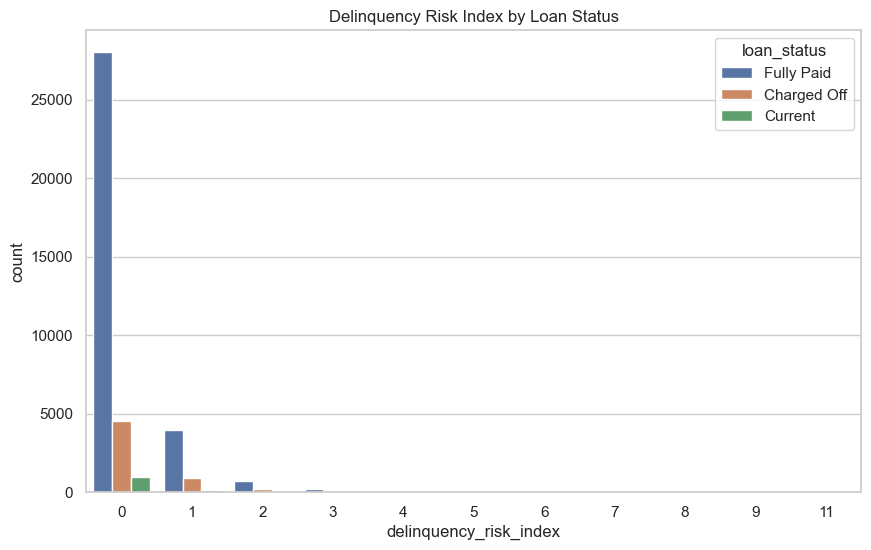

In [59]:
# . Delinquency Risk Index vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='delinquency_risk_index', hue='loan_status', data=df)
plt.title('Delinquency Risk Index by Loan Status')
plt.show()

## 4. Loan Payment to Principal Ratio vs. Loan Status

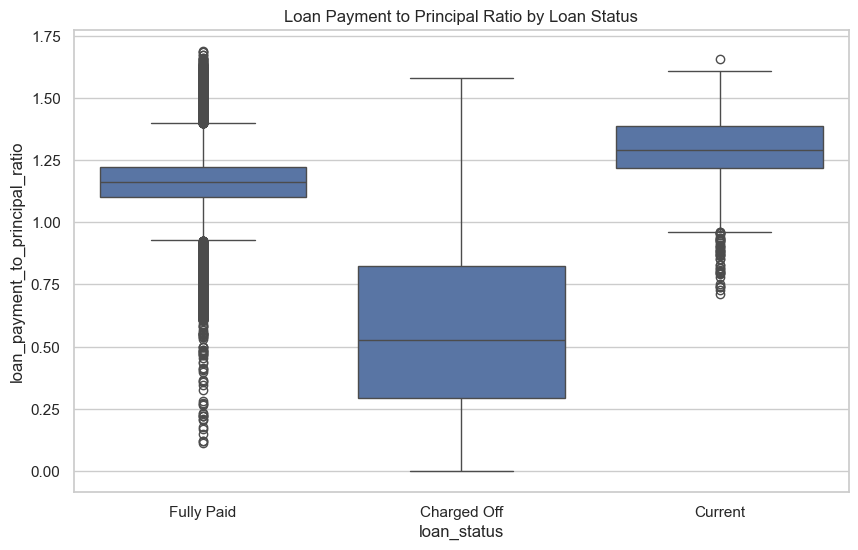

In [60]:
# . Loan Payment to Principal Ratio vs. Loan Status
# Loan Payment to Principal Ratio by Loan Status - Boxplot (Better Visualization)
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_payment_to_principal_ratio', data=df)
plt.title('Loan Payment to Principal Ratio by Loan Status')
plt.show()

## 5. Loan Principal Recovery Rate vs. Loan Status

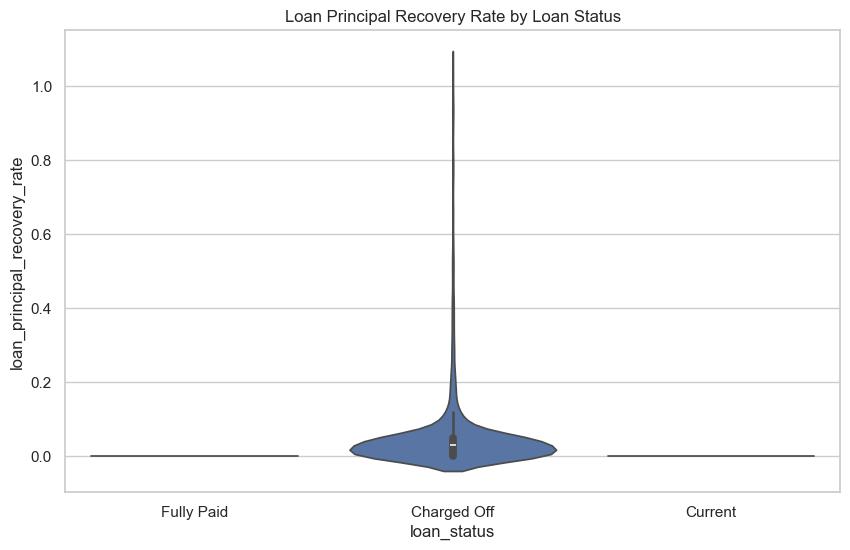

In [61]:
# . Loan Principal Recovery Rate vs. Loan Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status', y='loan_principal_recovery_rate', data=df)
plt.title('Loan Principal Recovery Rate by Loan Status')
plt.show()

## 6. Loan Charge-Off Rate by Grade

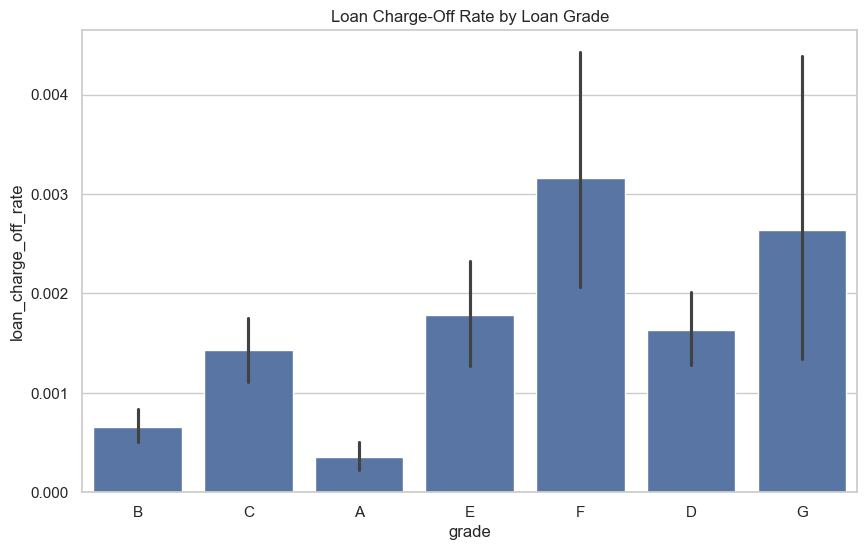

In [62]:
# . Loan Charge-Off Rate by Grade
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_charge_off_rate', data=df)
plt.title('Loan Charge-Off Rate by Loan Grade')
plt.show()

## 7. Loan Amount vs Loan Status

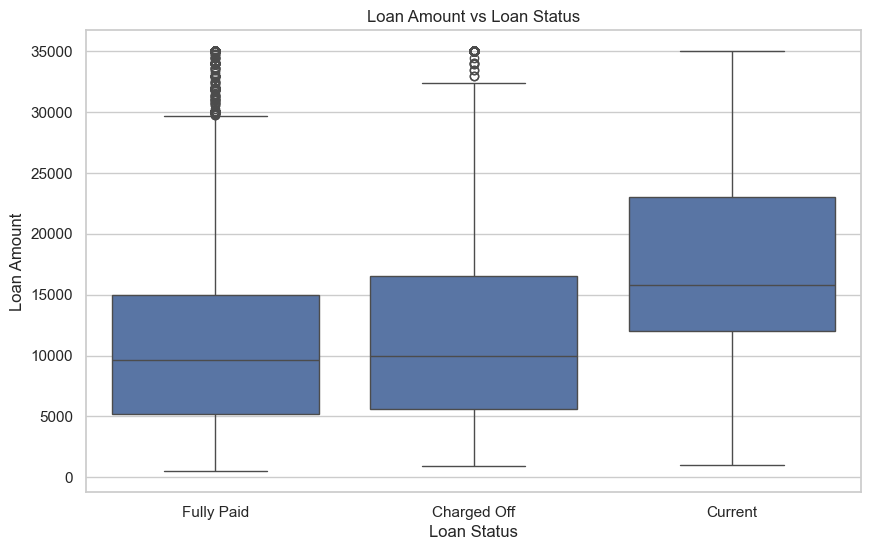

In [63]:
# . Loan Amount vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Amount vs Loan Status')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.show()

## 8. Debt-to-Income (DTI) Ratio vs Loan Status

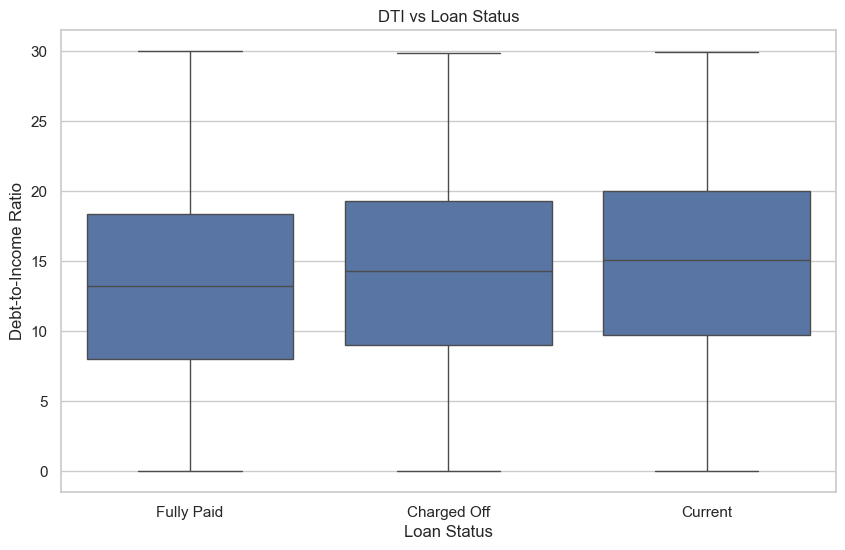

In [64]:
# . Debt-to-Income (DTI) Ratio vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title('DTI vs Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.xlabel('Loan Status')
plt.show()

## 9. Interest Rate vs Loan Status

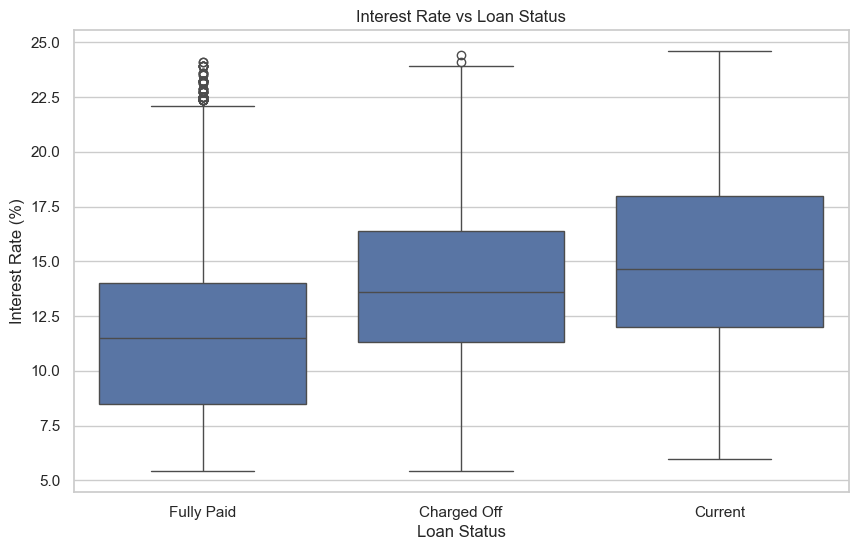

In [66]:
# . Interest Rate vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Interest Rate vs Loan Status')
plt.ylabel('Interest Rate (%)')
plt.xlabel('Loan Status')
plt.show()

## 10. Employment Length vs Loan Status

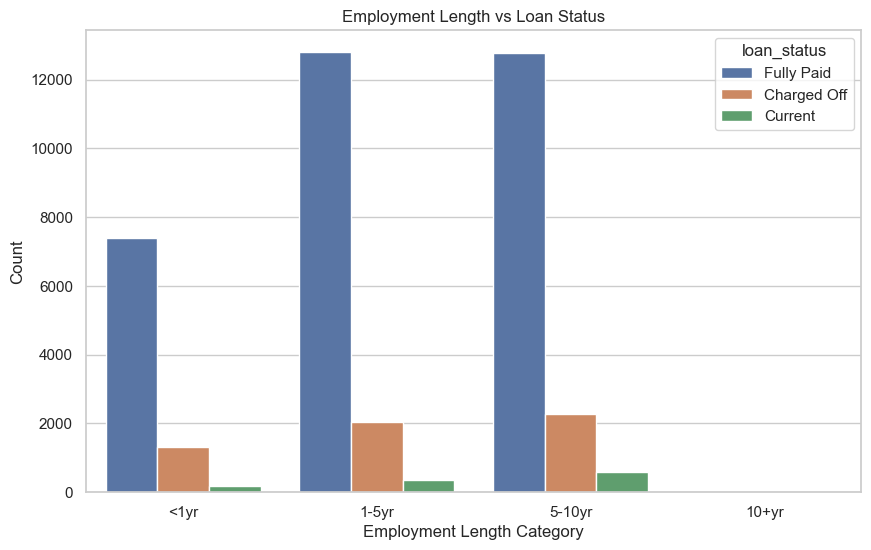

In [67]:
# . Employment Length vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length_cat', hue='loan_status', data=df)
plt.title('Employment Length vs Loan Status')
plt.ylabel('Count')
plt.xlabel('Employment Length Category')
plt.show()

## 11. Annual Income vs Loan Status

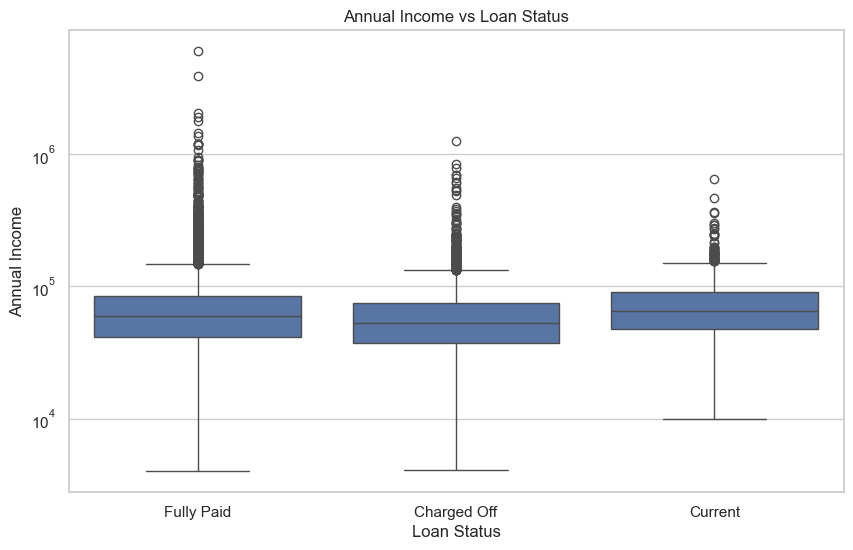

In [68]:
# . Annual Income vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.title('Annual Income vs Loan Status')
plt.ylabel('Annual Income')
plt.yscale('log')  # Log scale to better display high-income values
plt.xlabel('Loan Status')
plt.show()

## 12. Home Ownership vs Loan Status

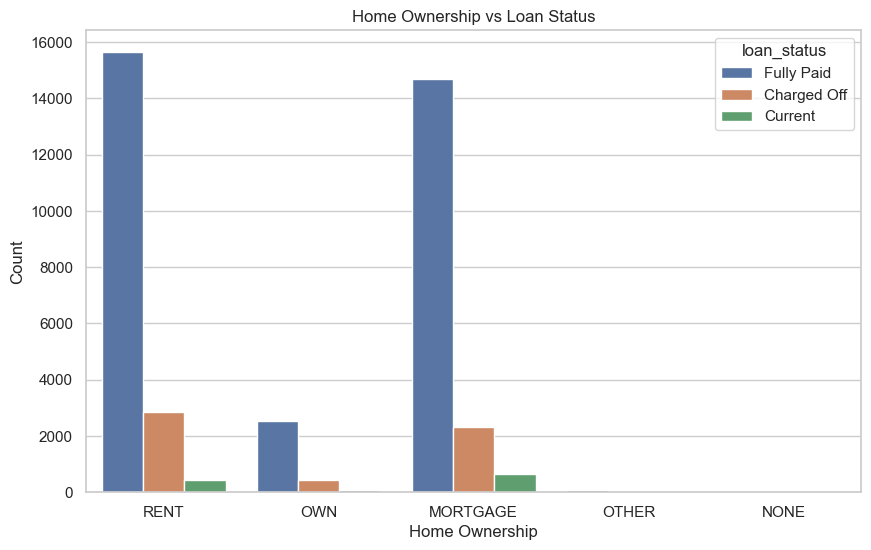

In [69]:
# . Home Ownership vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title('Home Ownership vs Loan Status')
plt.ylabel('Count')
plt.xlabel('Home Ownership')
plt.show()

## 13. Loan Amount vs Annual Income (colored by Loan Status)

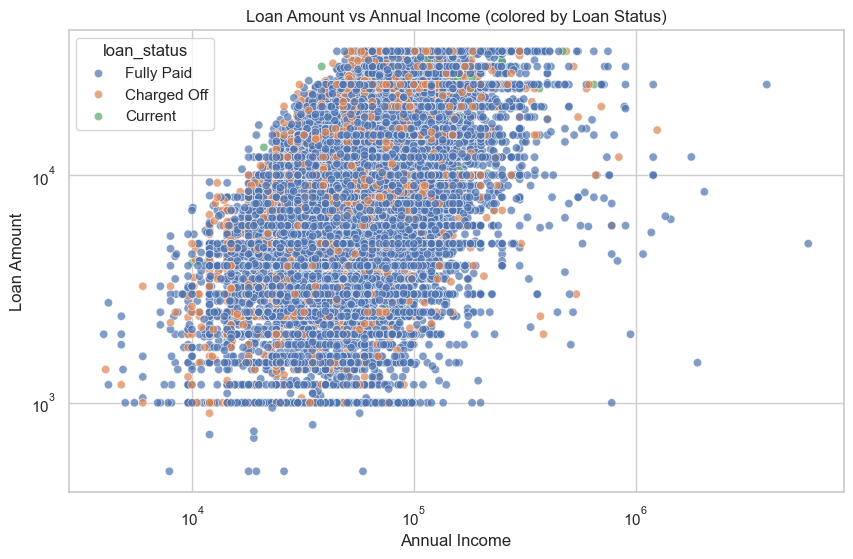

In [70]:
# . Loan Amount vs Annual Income (colored by Loan Status)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=df, alpha=0.7)
plt.title('Loan Amount vs Annual Income (colored by Loan Status)')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.yscale('log')
plt.xscale('log')
plt.show()

## 14. Interest Rate vs Credit Utilization (colored by Loan Status)

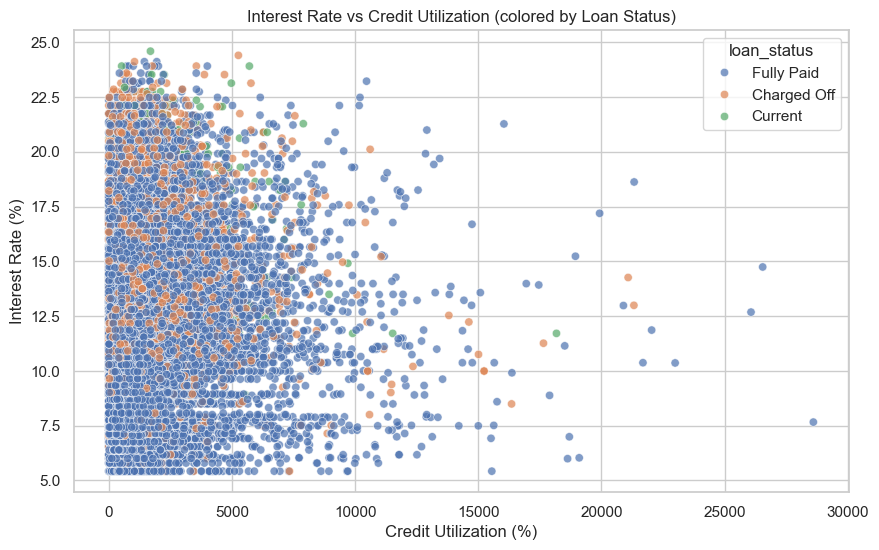

In [71]:
# . Interest Rate vs Credit Utilization (colored by Loan Status)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_utilization', y='int_rate', hue='loan_status', data=df, alpha=0.7)
plt.title('Interest Rate vs Credit Utilization (colored by Loan Status)')
plt.xlabel('Credit Utilization (%)')
plt.ylabel('Interest Rate (%)')
plt.show()

## 15. Loan Term vs Loan Amount (colored by Loan Status)

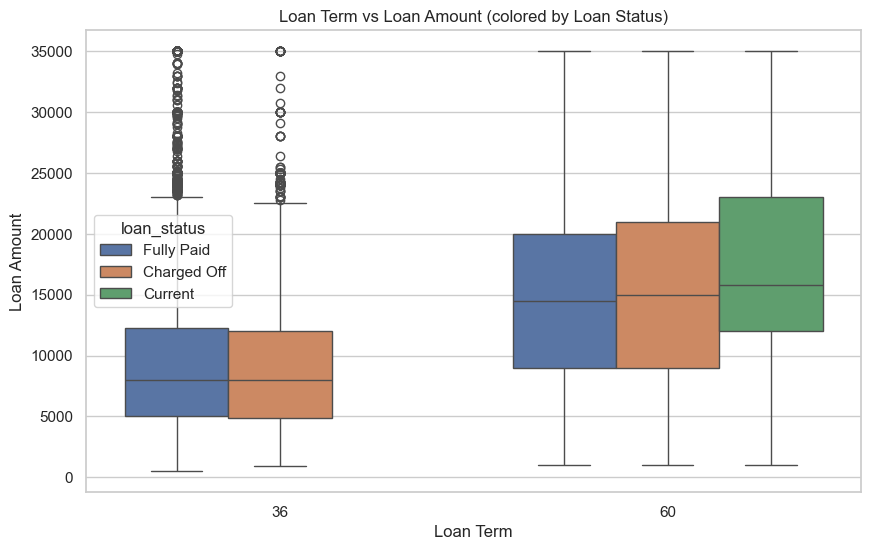

In [72]:
# . Loan Term vs Loan Amount (colored by Loan Status)
plt.figure(figsize=(10, 6))
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=df)
plt.title('Loan Term vs Loan Amount (colored by Loan Status)')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Term')
plt.show()

## 16. Employment Status vs Loan Purpose (colored by Loan Status)

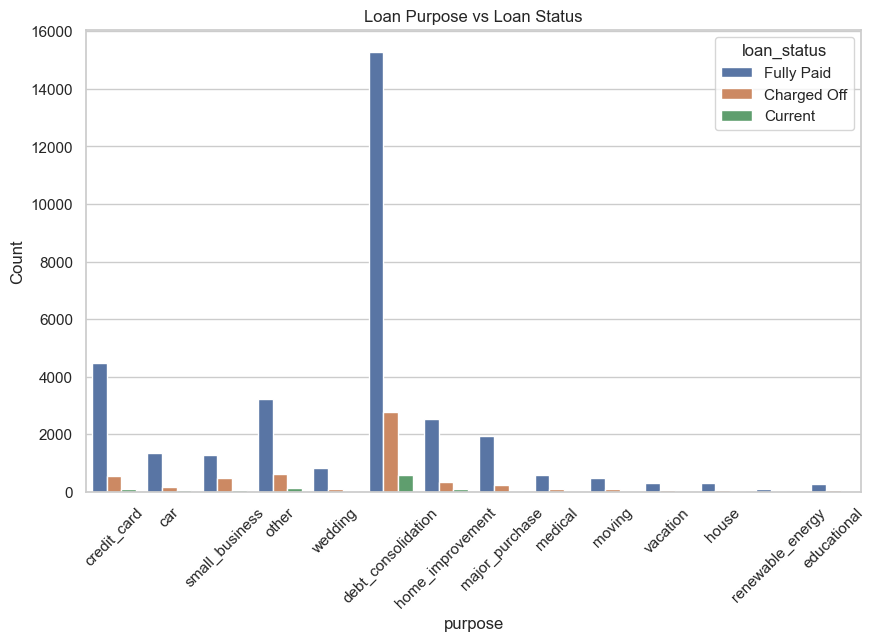

In [73]:
# . Employment Status vs Loan Purpose (colored by Loan Status)
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('Loan Purpose vs Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 17. Delinquency Risk Index vs Loan Status

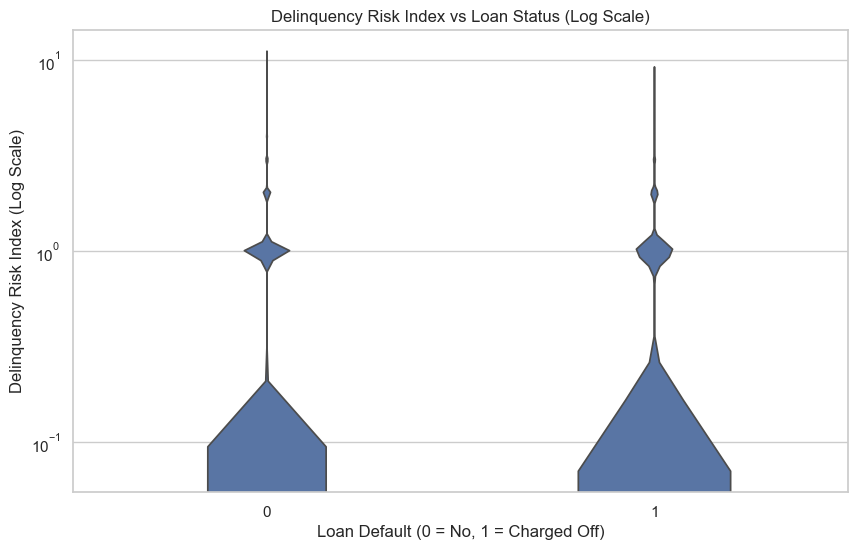

In [74]:
# Plot delinquency risk index and loan status
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_status_binary', y='delinquency_risk_index', data=df, inner=None)
plt.yscale('log')
plt.title('Delinquency Risk Index vs Loan Status (Log Scale)')
plt.xlabel('Loan Default (0 = No, 1 = Charged Off)')
plt.ylabel('Delinquency Risk Index (Log Scale)')
plt.show()

# MULTIVARIATE ANALYSIS

## 1. Interaction Between Loan Amount, Interest Rate, and DTI
We aim to identify how loan amount, interest rate, and debt-to-income ratio (DTI) affect the likelihood of default. This can help in determining high-risk loans.

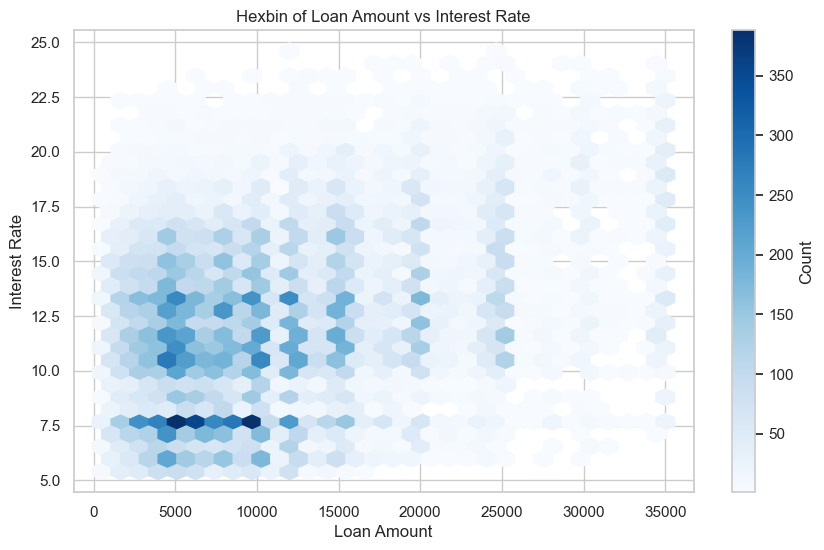

In [75]:
# Plot the interaction between loan_amnt, int_rate, and dti
plt.figure(figsize=(10, 6))
plt.hexbin(df['loan_amnt'], df['int_rate'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('Hexbin of Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

## 2. Income and Employment Length vs Loan Default
Analyze how a combination of employment length and annual income predicts the likelihood of default. The assumption here is that shorter employment length and lower income levels might correlate with higher default rates.

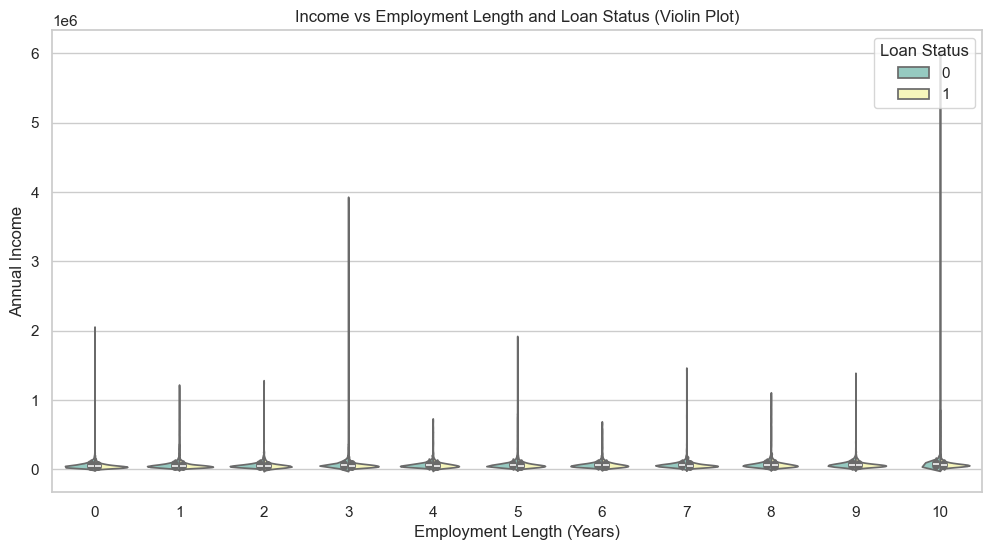

In [76]:
# Create a bivariate plot to explore the relationship between emp_length, annual_inc, and loan_status
plt.figure(figsize=(12, 6))
sns.violinplot(x='emp_length', y='annual_inc', hue='loan_status_binary', data=df, split=True, palette='Set3')
plt.title('Income vs Employment Length and Loan Status (Violin Plot)')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Annual Income')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

## 3. Loan Grade, Home Ownership, and DTI
Analyze how loan grades (assigned by the lending company), home ownership status, and debt-to-income ratio together affect the likelihood of default. This can highlight how credit risk assessments combine with personal circumstances.

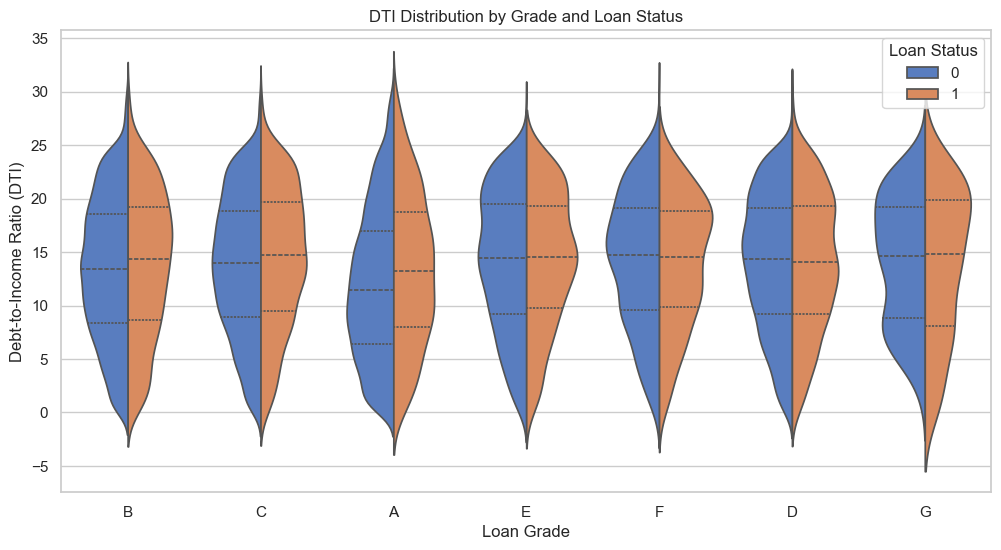

In [77]:
# Plot the relationship between grade, home_ownership, and dti with loan status
plt.figure(figsize=(12, 6))
sns.violinplot(x='grade', y='dti', hue='loan_status_binary', data=df, split=True, inner='quartile', palette='muted')
plt.title('DTI Distribution by Grade and Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

## 4. Loan Amount, Term, and Default
Longer loan terms with higher loan amounts could be an indicator of risk due to potential long-term financial instability.

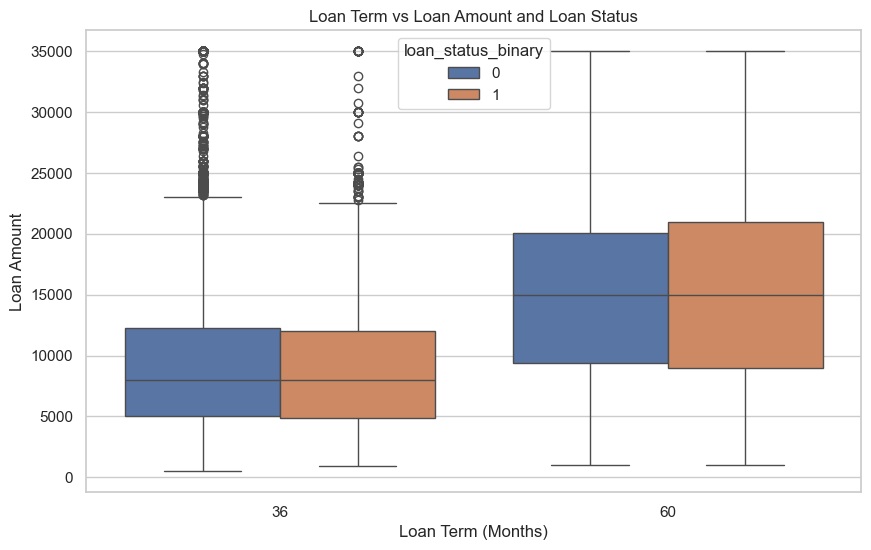

In [78]:
# Loan Term vs Loan Amount with Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='term', y='loan_amnt', hue='loan_status_binary', data=df)
plt.title('Loan Term vs Loan Amount and Loan Status')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Amount')
plt.show()

## 5. Correlation among all metrics
### i) For 'Fully Paid' loans:
This heatmap is created for people who have fully paid their loan amounts to identify the trend among loans with complete recovery

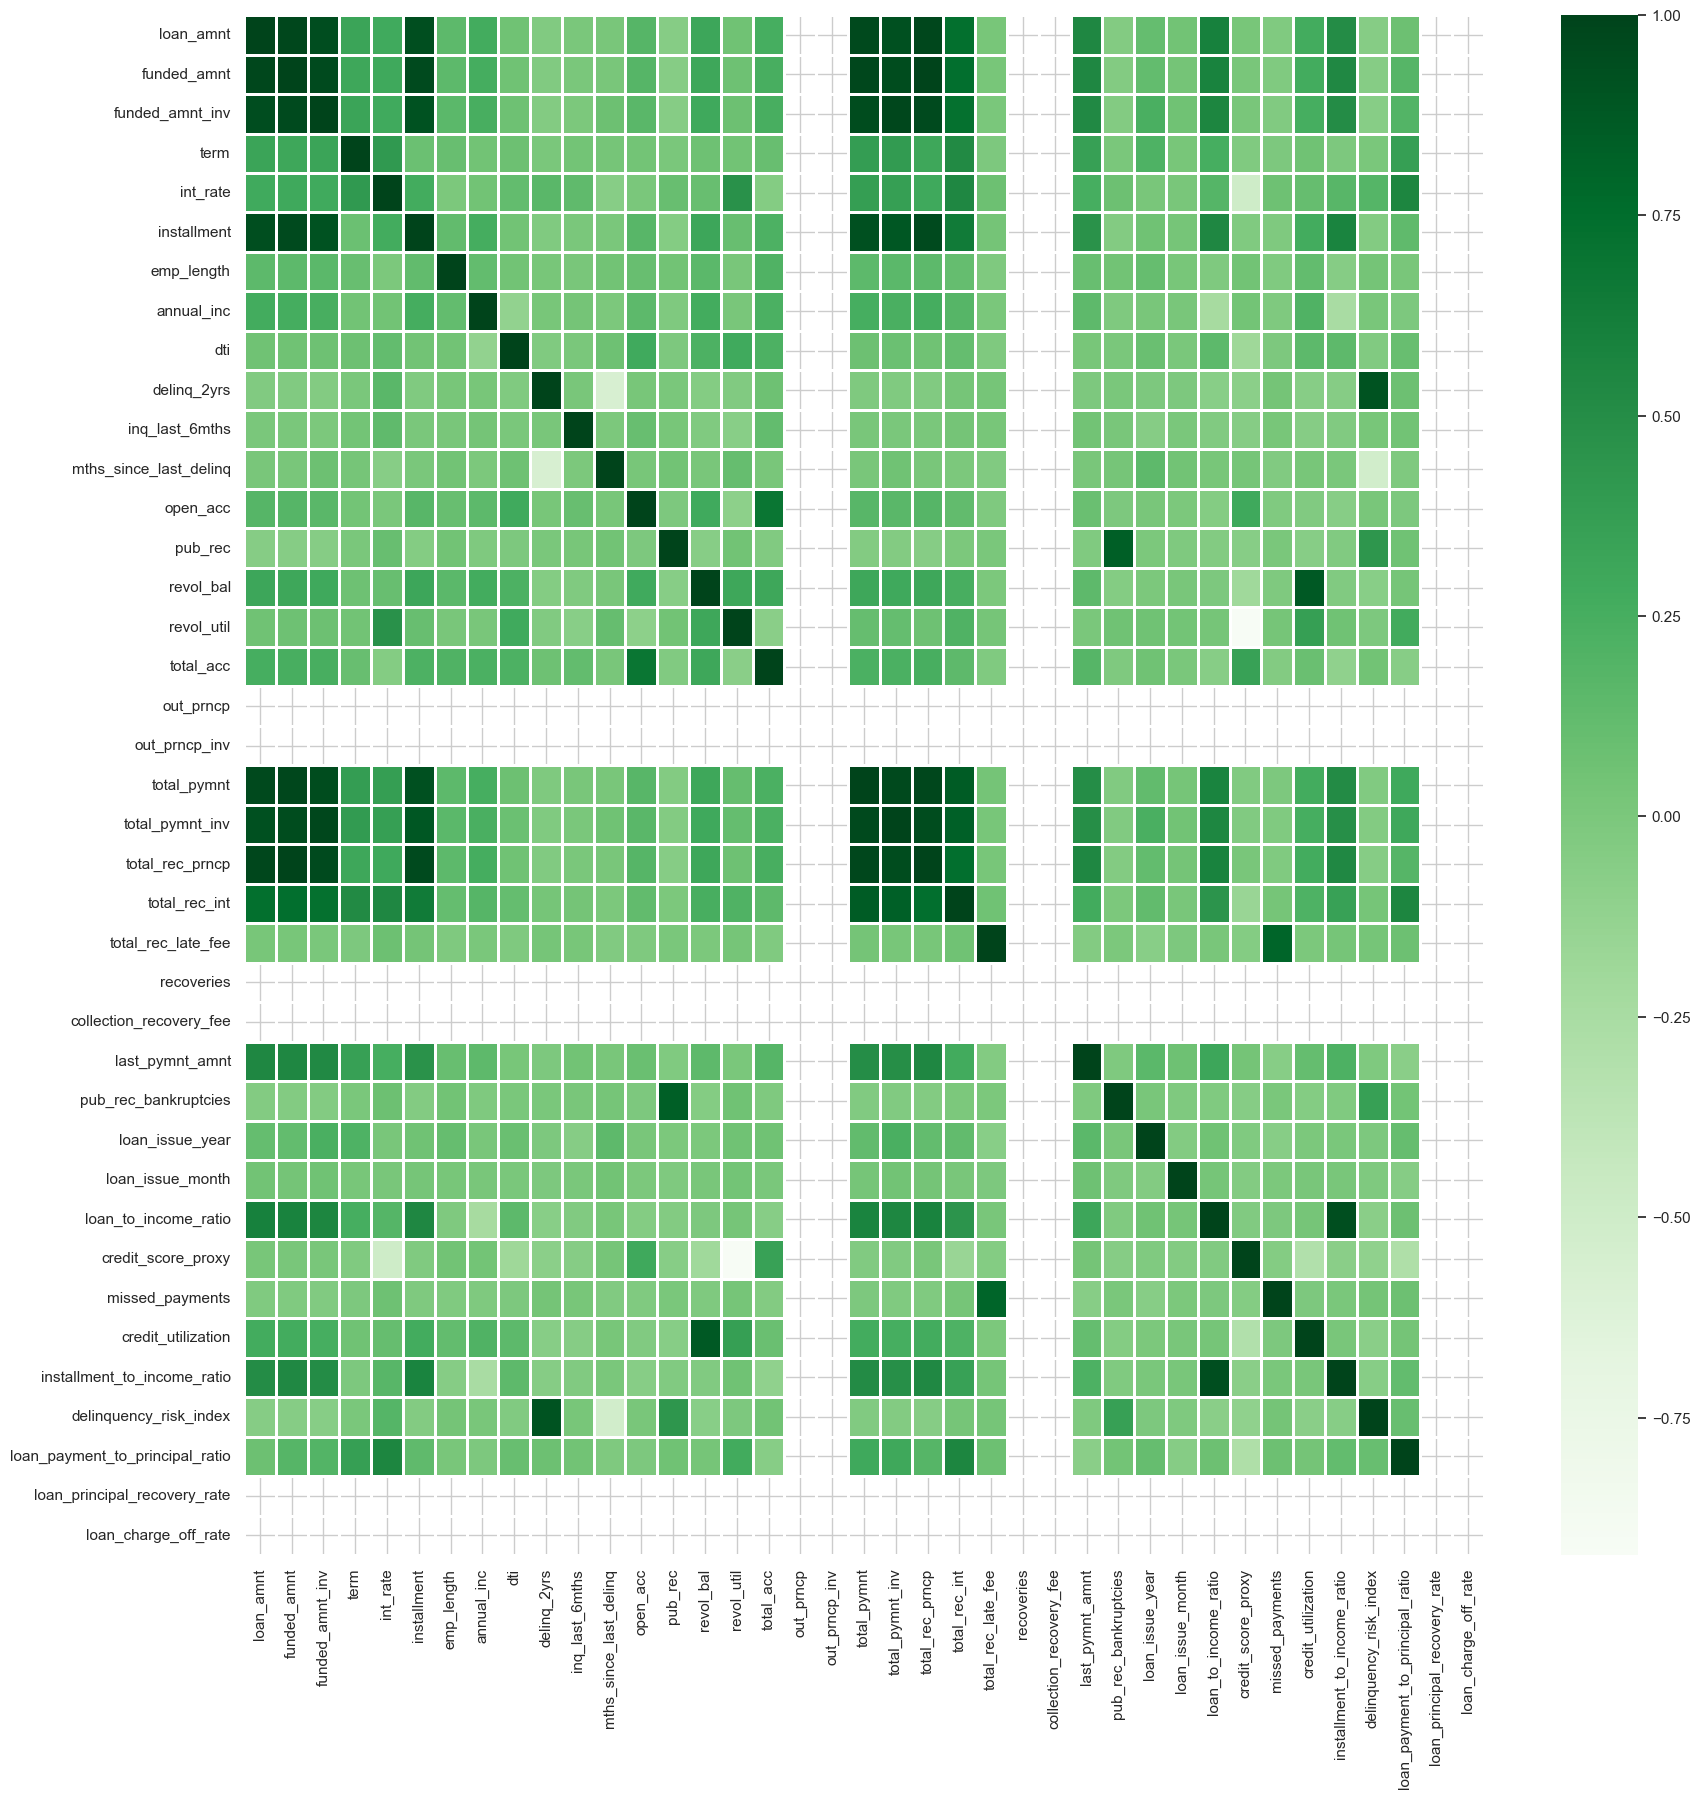

In [107]:
df_matrix_1 = df[df.loan_status == "Fully Paid"].loc[:, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'loan_issue_year', 'loan_issue_month', 'loan_to_income_ratio', 'credit_score_proxy', 'missed_payments', 'credit_utilization', 'installment_to_income_ratio', 'delinquency_risk_index', 'loan_payment_to_principal_ratio', 'loan_principal_recovery_rate', 'loan_charge_off_rate']].corr(numeric_only=True)

plt.figure(figsize=(20, 20))
sns.heatmap(df_matrix_1, cmap='Greens', linecolor='white', linewidth=1)
plt.show()

### ii) For 'Charged Off' loans:
This heatmap is created for loans that were charged off

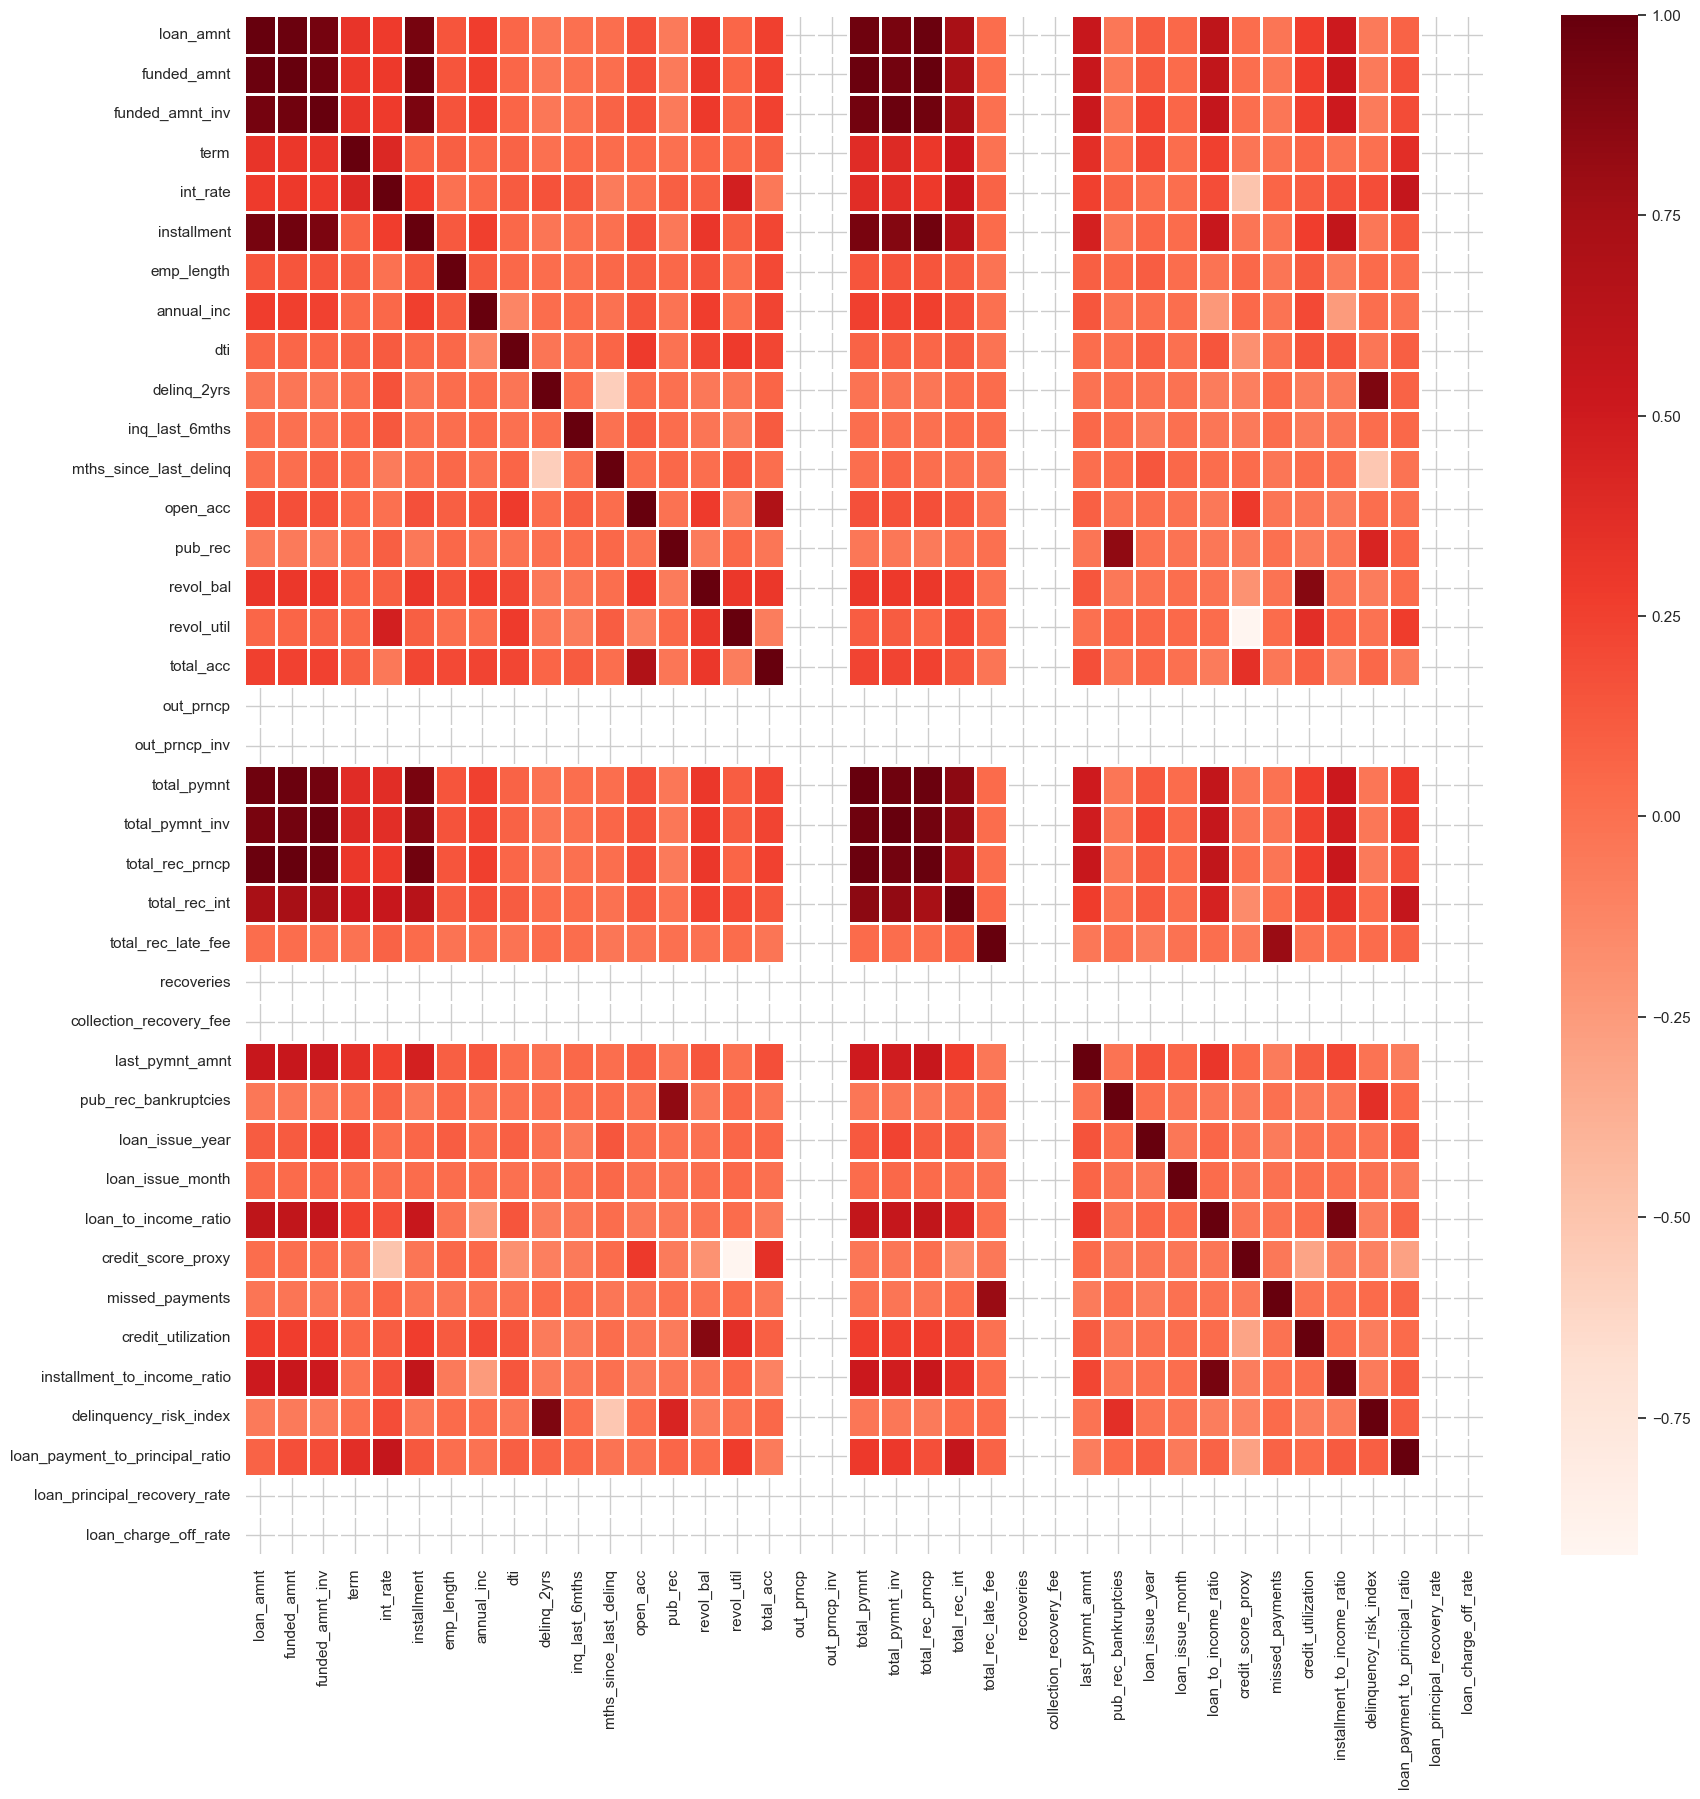

In [108]:
df_matrix_2 = df[df.loan_status == "Fully Paid"].loc[:, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'loan_issue_year', 'loan_issue_month', 'loan_to_income_ratio', 'credit_score_proxy', 'missed_payments', 'credit_utilization', 'installment_to_income_ratio', 'delinquency_risk_index', 'loan_payment_to_principal_ratio', 'loan_principal_recovery_rate', 'loan_charge_off_rate']].corr(numeric_only=True)

plt.figure(figsize=(20, 20))
sns.heatmap(df_matrix_2, cmap='Reds', linecolor='white', linewidth=1)
plt.show()

# Loan Policy Analysis Based on Heatmap Metrics

Based on the above heatmap of various financial metrics from past loan data, the following policies for granting loans could be proposed. These policies are designed to reduce the risk of loan defaults while promoting responsible lending practices. Each policy is explained considering the correlation of these metrics and their likely impact on loan risk and repayment ability.

## 1. Limit Loan Amount Based on Income
- **Policy**: The loan amount granted should be proportional to the borrower’s **annual income**, capped at a reasonable multiple (e.g., no more than 35% of the annual income).
- **Reasoning**: There is a positive correlation between **loan amount** and **annual income**. Higher-income borrowers are more likely to repay larger loans comfortably, while capping loan amounts reduces risk for lower-income borrowers, preventing them from taking on excessive debt.

## 2. Interest Rate Adjustment Based on Credit Utilization and Credit Score
- **Policy**: Offer lower interest rates to borrowers with a low **credit utilization** ratio and a higher **credit score** proxy.
- **Reasoning**: **Credit utilization** is negatively correlated with loan performance indicators such as **credit score proxy** and **delinquency risk index**. Borrowers with low credit utilization are less likely to default, making them lower risk. Coupled with a good **credit score**, this justifies offering favorable rates.

## 3. Stricter Lending Criteria for Borrowers with a History of Delinquency
- **Policy**: Require higher down payments or collateral for borrowers with a history of **delinquencies in the last 2 years** or those with recent **public records of bankruptcies**.
- **Reasoning**: Both **delinquencies** and **bankruptcies** show significant negative correlations with repayment metrics and positive correlations with risk indicators like **delinquency risk index**. Borrowers with these histories are high-risk and should face stricter lending terms.

## 4. Leverage Debt-to-Income (DTI) Ratio to Assess Loan Viability
- **Policy**: Limit loan approvals to borrowers with a **debt-to-income (DTI)** ratio below 40%.
- **Reasoning**: A high **DTI** ratio suggests the borrower is overleveraged and may struggle to meet additional debt obligations. The heatmap shows a correlation between **DTI** and **loan performance**, making it a critical metric for risk assessment.

## 5. Loan Tenure Based on Borrower Risk Profile
- **Policy**: Shorten loan terms for high-risk borrowers and extend them for low-risk borrowers, as determined by factors such as **employment length**, **annual income**, and **credit score**.
- **Reasoning**: Shorter tenures reduce risk exposure for the lender, while longer terms can make loans more affordable for low-risk borrowers. **Employment length** and **annual income** are positively correlated with loan performance, supporting this strategy.

## 6. Incorporate Loan-to-Value (LTV) Ratio to Protect Against Defaults
- **Policy**: Cap loan approvals based on a favorable **loan-to-principal ratio** (LTV). The lower the ratio (indicating higher borrower equity in the loan), the more favorable the loan terms.
- **Reasoning**: The heatmap shows a correlation between **loan-to-principal ratio** and **loan charge-off rate** (default rate). Borrowers with more equity invested are less likely to default, reducing lender exposure.

## 7. Employment Stability as a Primary Consideration for Loan Approval
- **Policy**: Give preference to borrowers with longer **employment length** and stable job history.
- **Reasoning**: **Employment length** is positively correlated with loan performance metrics. Borrowers with longer employment stability are more reliable, making this a key factor in loan eligibility.

## 8. Offer Incentives for Early Repayment
- **Policy**: Encourage borrowers to repay their loans early by offering interest rebates or fee waivers for **early payments**.
- **Reasoning**: Borrowers with **higher recovery rates** and **lower total late fee accumulation** perform better overall. Incentivizing early repayment can improve cash flow for the lender and reduce default risk.

## 9. Monitor Revolving Credit Balance and Payment-to-Income Ratio
- **Policy**: Deny loans to borrowers with high **revolving balances** relative to their income or with a high **loan-to-income ratio**.
- **Reasoning**: A high **revolving balance** and **loan-to-income ratio** suggest the borrower is carrying a large amount of debt, increasing the likelihood of default. These metrics correlate negatively with loan performance and should be closely monitored.

## 10. Increase Down Payment for Borrowers with Low Recovery Rates
- **Policy**: For borrowers with low **recovery rates** or a history of missed payments, require larger down payments or collateral.
- **Reasoning**: **Missed payments** and **collection recovery fees** correlate with poor loan performance. Increasing down payments or requiring collateral reduces the risk of loss for the lender.